## 傾向スコア
- 岩波DS vol.3 CM接触のアプリ利用への因果効果推定（https://github.com/iwanami-datascience/vol3/tree/master/kato%26hoshino ）

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

import itertools
import time

### データの読み込み

In [80]:
data = pd.read_csv('./q_data_x.csv')
data.columns

Index(['cm_dummy', 'gamedummy', 'area_kanto', 'area_keihan', 'area_tokai',
       'area_keihanshin', 'age', 'sex', 'marry_dummy', 'job_dummy1',
       'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5', 'job_dummy6',
       'job_dummy7', 'job_dummy8', 'inc', 'pmoney', 'fam_str_dummy1',
       'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4', 'fam_str_dummy5',
       'child_dummy', 'T', 'F1', 'F2', 'F3', 'M1', 'M2', 'M3', 'TVwatch_day',
       'gamesecond', 'gamecount'],
      dtype='object')

In [81]:
X = data[['TVwatch_day', 'age', 'sex', 'marry_dummy', 'child_dummy', 'inc', 'pmoney','area_kanto', 'area_tokai', 'area_keihanshin', 
          'job_dummy1', 'job_dummy2', 'job_dummy3', 'job_dummy4', 'job_dummy5', 'job_dummy6', 'job_dummy7',
          'fam_str_dummy1', 'fam_str_dummy2', 'fam_str_dummy3', 'fam_str_dummy4']]
Z = data['cm_dummy']

### 傾向スコアの推定
- $e(X_i) = p(Z_i=1|X_i)$

ユーザー$i$が処置群に存在する（$Z_i=1$）確率

In [82]:
lr = LogisticRegression()
lr.fit(X, Z)

C:\Users\The-A\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
ps = lr.predict_proba(X)[:, 1]
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))

AUC = 0.789


In [84]:
logit_model = sm.Logit(endog=Z, exog=X)
logit_res = logit_model.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.544505
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               cm_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Tue, 06 Aug 2019   Pseudo R-squ.:                  0.1974
Time:                        08:38:24   Log-Likelihood:                -5445.1
converged:                       True   LL-Null:                       -6784.2
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
TVwatch_day         0.0001   4.13e-06     31.870      0.000       0.000       0.000
age                -0.0120      0.003     -4.609      0.000      -0.017      -0.007
sex                -0.0456      0.064     -0.713      0.476      -0.171       0.080
marry_dummy         0.0214      0.084      0.254      0.800      -0.144       0.187
child_dummy         0.2383      0.073      3.243      0.001       0.094       0.382
inc                -0.0003      0.000     -1.685      0.092      -0.001    4.51e-05
pmoney              0.0078      0.008      1.016      0.310      -0.007       0.023
area_kanto          0.3914      0.079      4.962      0.000       0.237       0.546
area_tokai         -0.7446      0.076     -9.772      0.000      -0.894      -0.595
area_keihanshin    -2.0444      0.075    -27.136      0.000      -2.192      -1.897
job_dummy1         -0.3887      0.130     -2.988      0.003      -0.644      -0.134
job_dummy2         -0.3374      0.149     -2.270      0.023      -0.629      -0.046
job_dummy3          0.0154      0.139      0.111      0.912      -0.257       0.288
job_dummy4         -0.1513      0.229     -0.661      0.508      -0.599       0.297
job_dummy5          0.1037      0.128      0.813      0.416      -0.146       0.354
job_dummy6         -0.2615      0.134     -1.948      0.051      -0.525       0.002
job_dummy7         -0.4314      0.161     -2.684      0.007      -0.746      -0.116
fam_str_dummy1     -0.1472      0.145     -1.016      0.310      -0.431       0.137
fam_str_dummy2      0.0439      0.157      0.279      0.780      -0.265       0.352
fam_str_dummy3     -0.2868      0.143     -2.004      0.045      -0.567      -0.006
fam_str_dummy4     -0.7289      0.169     -4.321      0.000      -1.059      -0.398
===================================================================================
"""

In [85]:
ps = logit_res.predict(X)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))

AUC = 0.787


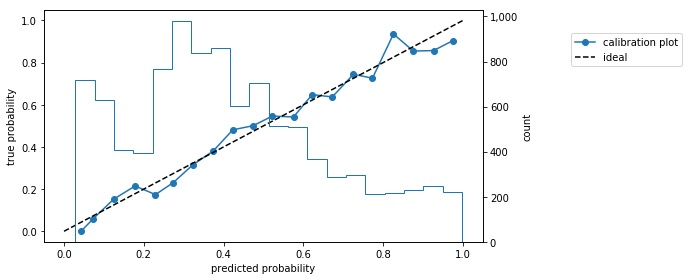

In [86]:
_, ax1 = plt.subplots(figsize=(10, 4))

prob_true, prob_pred = calibration_curve(y_true=Z, y_prob=ps, n_bins=20)
ax1.plot(prob_pred, prob_true, marker='o', label='calibration plot')
ax1.plot([0,1], [0,1], linestyle='--', color='black', label='ideal')
ax1.legend(bbox_to_anchor=(1.2, 0.9), loc='upper left', borderaxespad=0) # 凡例はグラフの外
ax1.set_xlabel('predicted probability')
ax1.set_ylabel('true probability')

ax2 = ax1.twinx()
ax2.hist(ps, bins=20, histtype="step", rwidth=0.9)
ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # 軸ラベル　3桁ごとにカンマ
ax2.set_ylabel('count')
plt.tight_layout()
plt.show()

### 共変量の分布

In [87]:
ps_df = pd.DataFrame(ps, columns=['ps'])
data = pd.concat([data, ps_df], axis=1)

In [88]:
def plot_continuous_covariate_distribution(X, Z, ps, var_name):
    X1 = np.array(X.loc[Z==1, var_name])
    X0 = np.array(X.loc[Z==0, var_name])
    ps0 = np.array(ps[Z==0])
    p1 = len(Z[Z==1])/len(Z)
    p0 = len(Z[Z==0])/len(Z)
    X10 = X0*ps0/(1-ps0)
    #X10 = X0*(ps0/p1)/((1-ps0)/p0)

    x_min = np.min(X[var_name])
    x_max = np.max(X[var_name])
    
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.distplot(X1, label='Z=1')
    sns.distplot(X0, label='Z=0')
    plt.title('original')
    plt.xlabel(var_name)
    plt.ylabel('density')
    plt.xlim([0.9*x_min, 1.1*x_max])

    plt.subplot(1,2,2)
    sns.distplot(X1, label='Z=1')
    sns.distplot(X10, label='Z=0')
    plt.title('ATT')
    plt.xlabel(var_name)
    plt.ylabel('density')
    plt.xlim([0.9*x_min, 1.1*x_max])
    
    plt.show()

In [89]:
def calculate_univariate_standardized_bias(X, Z, ps, var_name):
    X1 = np.array(X.loc[Z==1, var_name])
    X0 = np.array(X.loc[Z==0, var_name])
    ps0 = np.array(ps[Z==0])
    p1 = len(Z[Z==1])/len(Z)
    p0 = len(Z[Z==0])/len(Z)
    #X10 = X0*(ps0/p1)/((1-ps0)/p0)
    X10 = X0*ps0/(1-ps0)
    
    print(var_name + ':')
    #sb_before = (np.mean(X1) - np.mean(X0)) / np.sqrt(np.var(X1)/len(X1) + np.var(X0)/len(X0))
    sb_before = (np.mean(X1) - np.mean(X0)) / np.sqrt((np.var(X1) + np.var(X0))/2)
    print('standardized bias between treated and untreated = {:.2f}'.format(sb_before))
    #sb_after = (np.mean(X1) - np.mean(X10)) / np.sqrt(np.var(X1)/len(X1) + np.var(X10)/len(X10))
    sb_after = (np.mean(X1) - np.mean(X10)) / np.sqrt((np.var(X1) + np.var(X10))/2)
    print('difference between treated and adjusted untreated = {:.2f}'.format(sb_after))
    
    return sb_before, sb_after

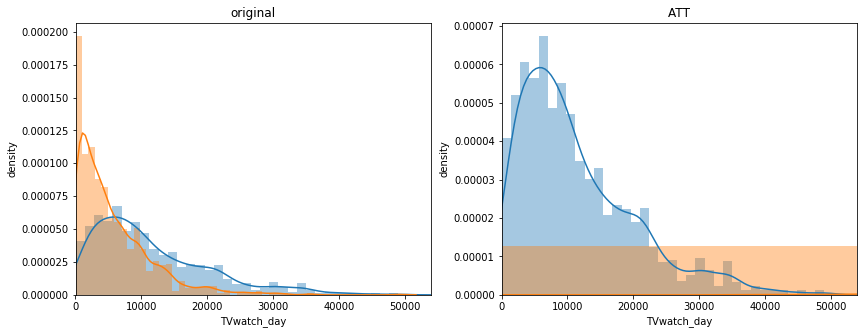

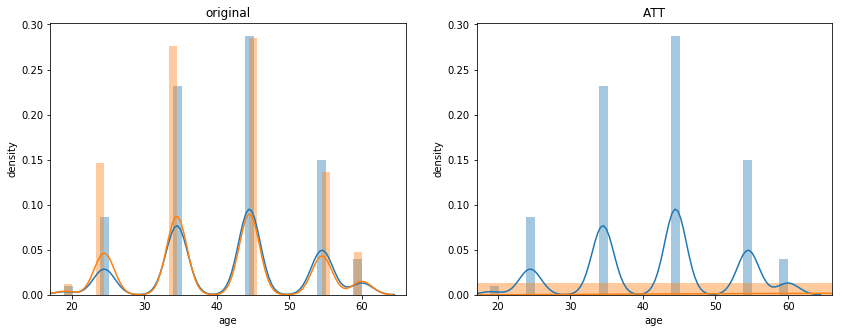

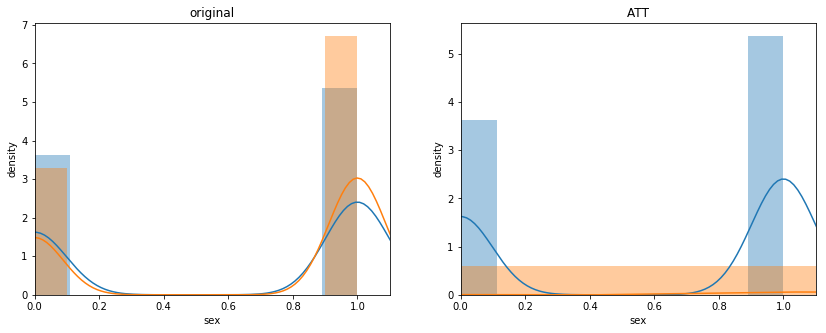

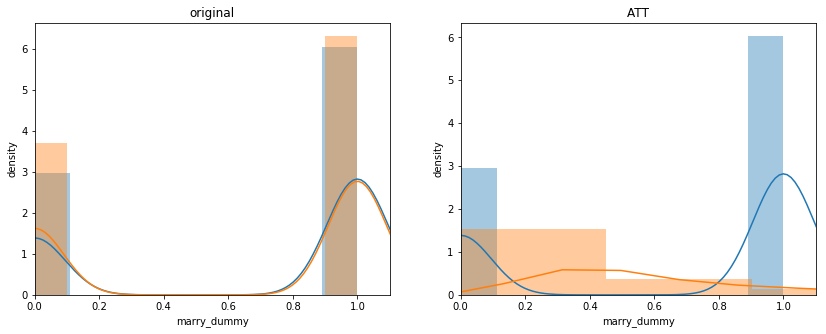

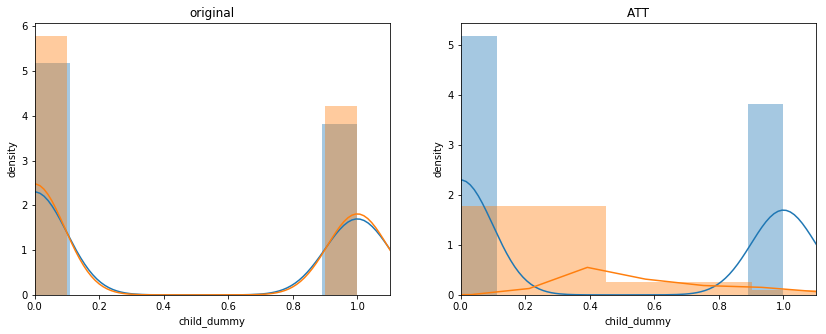

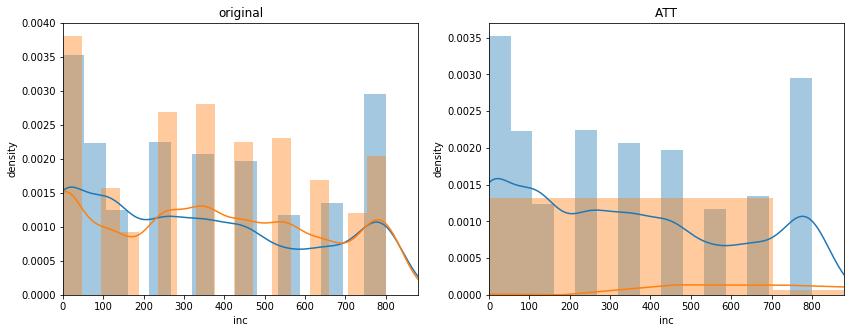

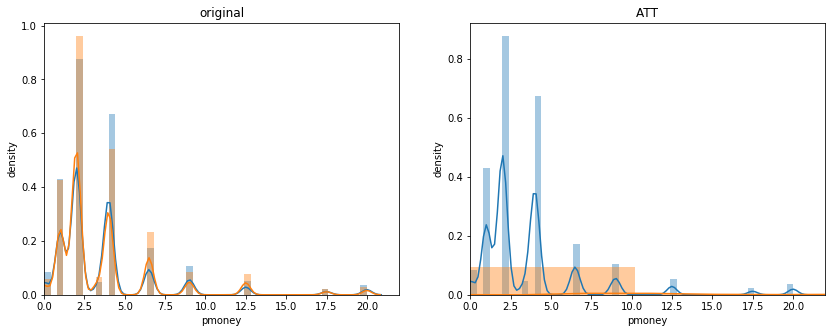

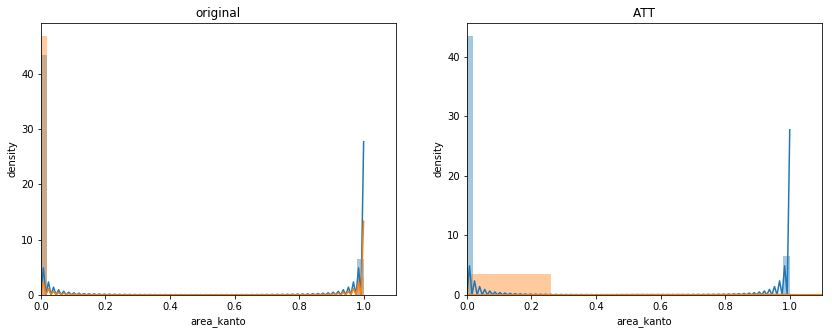

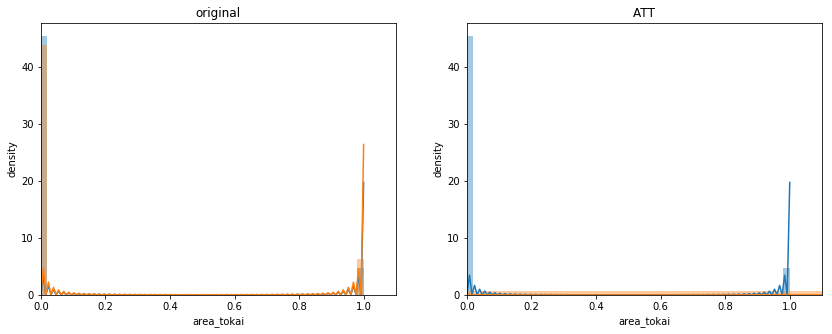

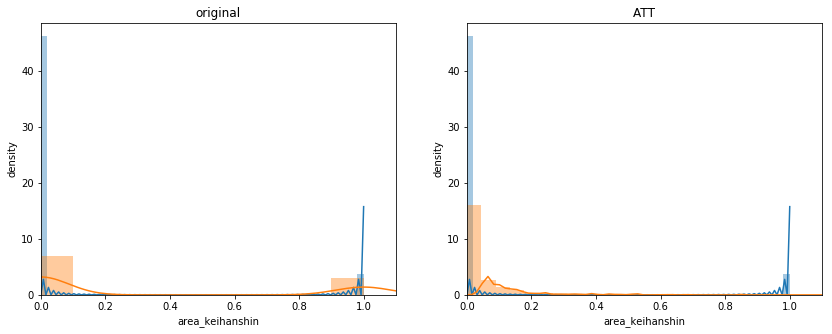

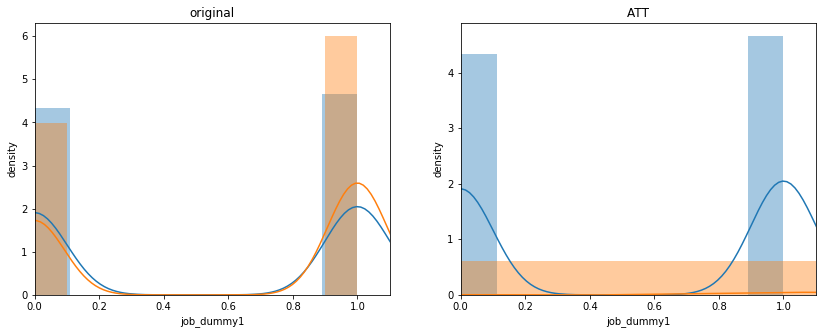

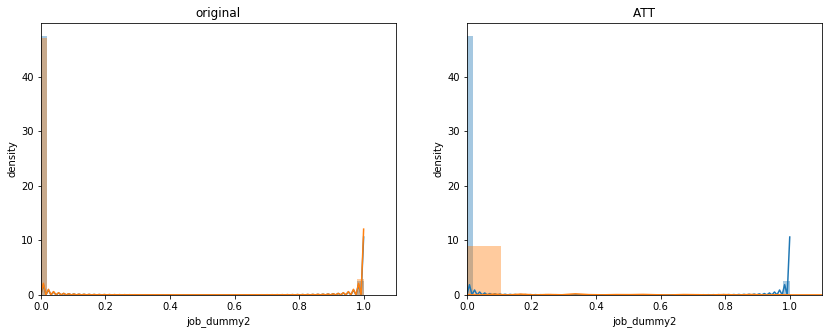

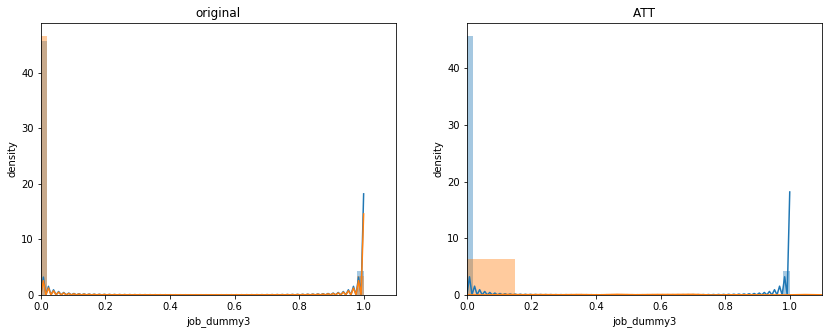

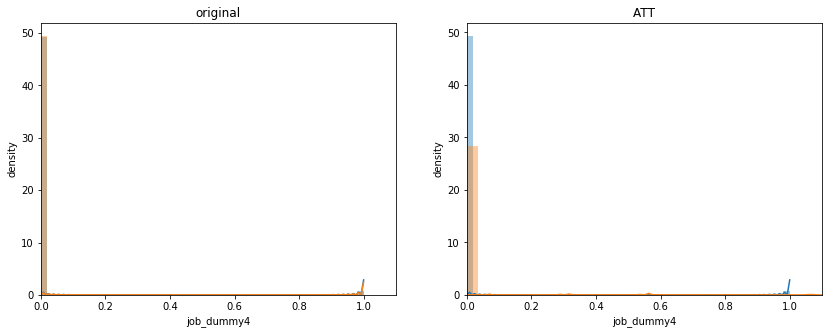

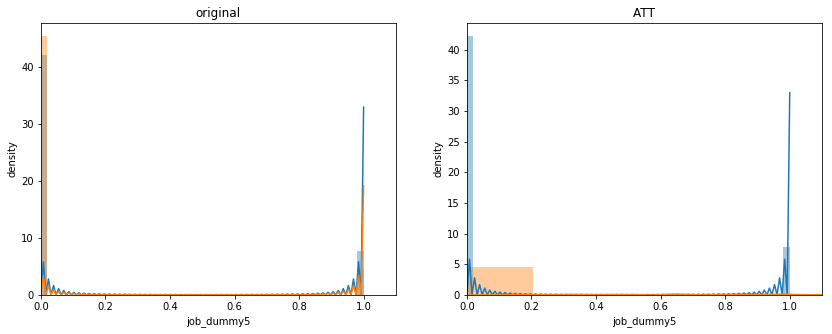

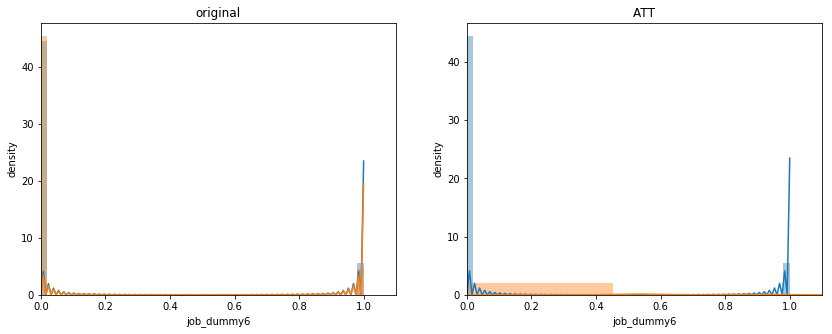

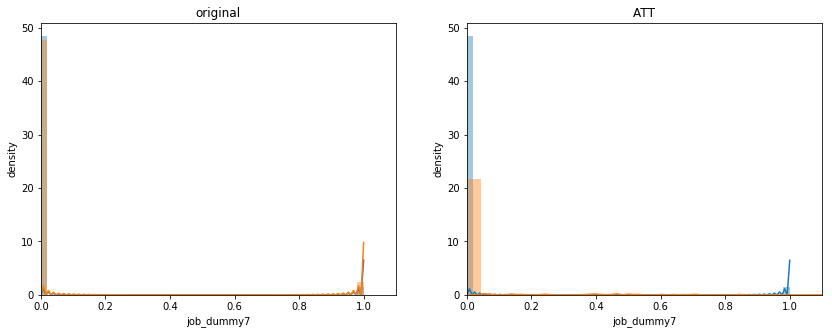

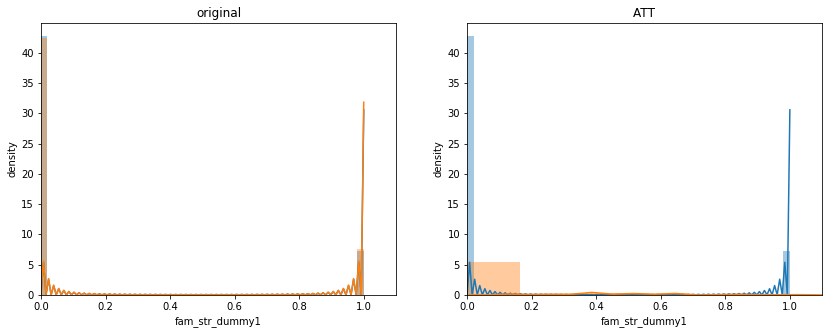

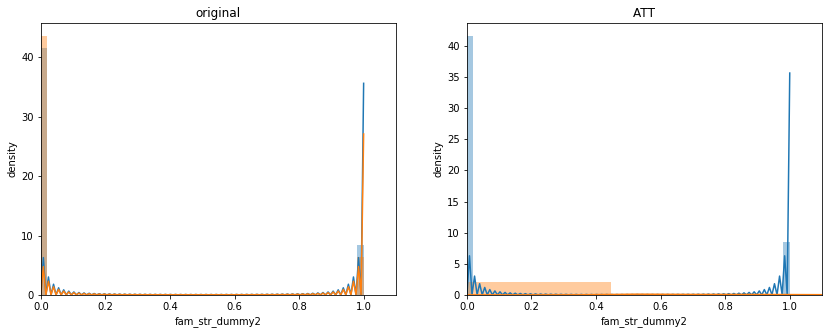

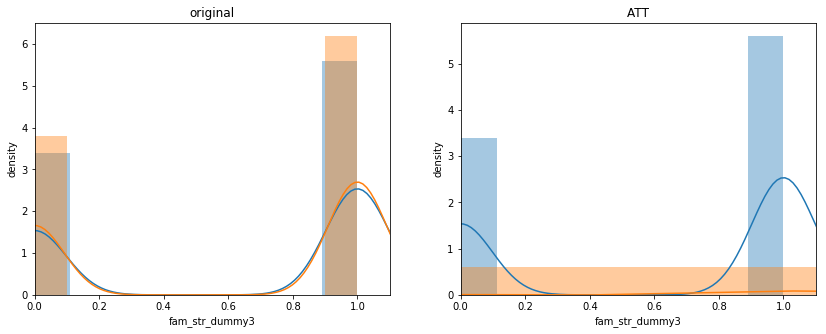

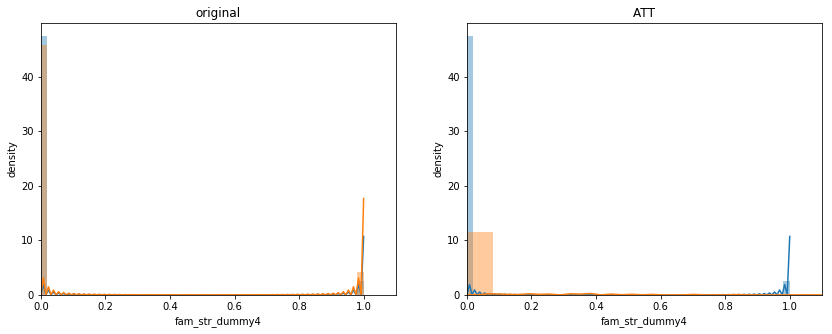

In [12]:
for col in X.columns:
    plot_continuous_covariate_distribution(X=X, Z=Z, ps=ps, var_name=col)

In [90]:
sb_list = []
for col in X.columns:
    if col != 'const':
        sb_before, sb_after = calculate_univariate_standardized_bias(X=X, Z=Z, ps=ps, var_name=col)
        sb_list.append([col, sb_before, sb_after])
sb_df = pd.DataFrame(sb_list, columns=['covariate', 'SB(before)', 'SB(after)'])

TVwatch_day:
standardized bias between treated and untreated = 0.77
difference between treated and adjusted untreated = -0.02
age:
standardized bias between treated and untreated = 0.15
difference between treated and adjusted untreated = 0.07
sex:
standardized bias between treated and untreated = -0.15
difference between treated and adjusted untreated = 0.04
marry_dummy:
standardized bias between treated and untreated = 0.08
difference between treated and adjusted untreated = 0.13
child_dummy:
standardized bias between treated and untreated = 0.01
difference between treated and adjusted untreated = 0.16
inc:
standardized bias between treated and untreated = -0.10
difference between treated and adjusted untreated = 0.05
pmoney:
standardized bias between treated and untreated = -0.00
difference between treated and adjusted untreated = 0.05
area_kanto:
standardized bias between treated and untreated = 0.23
difference between treated and adjusted untreated = 0.08
area_tokai:
standardized b

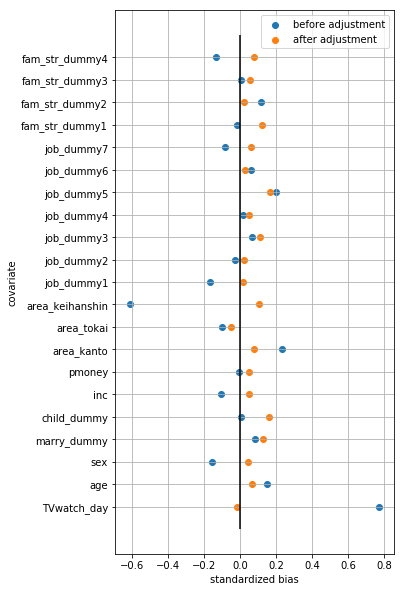

In [91]:
plt.figure(figsize=(5, 10))

plt.scatter(sb_df['SB(before)'], sb_df['covariate'], label='before adjustment')
plt.scatter(sb_df['SB(after)'], sb_df['covariate'], label='after adjustment')
plt.vlines([0], ymin=-1, ymax=X.shape[1])
plt.legend()
plt.xlabel('standardized bias')
plt.ylabel('covariate')
plt.grid(True)
plt.show()

In [95]:
br_list = []
for col in X.columns:
    if col != 'const':
        sb_before, sb_after = calculate_univariate_standardized_bias(X=X, Z=Z, ps=ps, var_name=col)
        br = (abs(sb_before) - abs(sb_after)) / abs(sb_before)
        print(br)
        br_list.append(br)
print('mean bias reduction = {:.3f}'.format(np.mean(br_list)))

TVwatch_day:
standardized bias between treated and untreated = 0.77
difference between treated and adjusted untreated = -0.02
0.976672563833663
age:
standardized bias between treated and untreated = 0.15
difference between treated and adjusted untreated = 0.07
0.5464499019518528
sex:
standardized bias between treated and untreated = -0.15
difference between treated and adjusted untreated = 0.04
0.7301078358318962
marry_dummy:
standardized bias between treated and untreated = 0.08
difference between treated and adjusted untreated = 0.13
-0.5011121034202465
child_dummy:
standardized bias between treated and untreated = 0.01
difference between treated and adjusted untreated = 0.16
-30.784519206610792
inc:
standardized bias between treated and untreated = -0.10
difference between treated and adjusted untreated = 0.05
0.5305528718983795
pmoney:
standardized bias between treated and untreated = -0.00
difference between treated and adjusted untreated = 0.05
-11.813127002776383
area_kanto:
sta

### 因果効果推定

- CM接触群とCM非接触群の平均値の比較差 

$E(Y_1|Z=1) - E(Y_0|Z=0)$

割り付け$Z$がランダムであれば、$Z$の因果効果は正しく推定できる

In [15]:
E1 = np.mean(data.loc[data['cm_dummy']==1, 'gamedummy'])
E0 = np.mean(data.loc[data['cm_dummy']==0, 'gamedummy'])
diff = E1 - E0

print('diff = {:.3f}, (E(Y1|Z=1) = {:.3f}, E(Y0|Z=0) = {:.3f})'.format(diff, E1, E0))

diff = 0.002, (E(Y1|Z=1) = 0.075, E(Y0|Z=0) = 0.073)


In [ ]:
import time

sample_size = len(data[data['cm_dummy']==1])
mean_diff_list = []

start_time = time.time()

for i in range(10000):
    Y1s = data.loc[data['cm_dummy']==1, 'gamedummy'].sample(n=sample_size, replace=True, random_state=i)
    Y0s = data.loc[data['cm_dummy']==0, 'gamedummy'].sample(n=sample_size, replace=True, random_state=i)
    
    mean_diff = np.mean(Y1s) - np.mean(Y0s)
    mean_diff_list.append(mean_diff)

elapsed_time = time.time() - start_time

print('diff = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(mean_diff_list), np.std(mean_diff_list)*1.96, np.std(mean_diff_list)))
print('elaspsed time = {:.3f}(s)'.format(elapsed_time))

- 平均処置効果（ATE, Average Treatment Effect）

$ATE = E(Y_1) - E(Y_0)$

（すべての人がCMに接触した場合のアプリ利用）-（すべての人がCMに接触しない場合のアプリ利用）

In [16]:
Z = data['cm_dummy']
Y = data['gamedummy']
ps = data['ps']
w1 = Z / ps
w0 = (1-Z) / (1-ps)

E1 = np.sum(Y * w1) / np.sum(w1)
E0 = np.sum(Y * w0) / np.sum(w0)
ATE = E1 - E0

print('ATE = {:.3f}, (E1 = {:.3f}, E0 = {:.3f})'.format(ATE, E1, E0))

ATE = 0.024, (E1 = 0.086, E0 = 0.062)


In [ ]:
sample_size = len(data.loc[data['cm_dummy']==1])
ATE_list = []

for i in range(10000):
    idx1 = pd.Series(data.loc[data['cm_dummy']==1, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(data.loc[data['cm_dummy']==0, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    
    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w1_tmp = Z_tmp / ps_tmp
    w0_tmp = (1-Z_tmp) / (1-ps_tmp)
    
    E1 = np.sum(Y_tmp * w1_tmp) / np.sum(w1_tmp)
    E0 = np.sum(Y_tmp * w0_tmp) / np.sum(w0_tmp)
    ATE = E1 - E0
    ATE_list.append(ATE)
    
print('ATE = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATE_list), np.std(ATE_list)*1.96, np.std(ATE_list)))

- 処置群における平均処置効果（ATT, Average Treatment effect on the Treated）

$ATT=E(Y_1|Z=1)-E(Y_0|Z=1)$

CM接触者におけるアプリ利用の伸び

In [17]:
Z = data['cm_dummy']
Y = data['gamedummy']
ps = data['ps']
w01 = (1-Z)*ps / (1-ps)

E11 = np.mean(Y[Z==1])
E01 = np.sum(Y * w01) / np.sum(w01)
ATT = E11 - E01

print('ATT = {:.3f}, (E11 = {:.3f}, E01 = {:.3f})'.format(ATT, E11, E01))

ATT = 0.026, (E11 = 0.075, E01 = 0.049)


In [ ]:
sample_size = len(data.loc[data['cm_dummy']==1])
ATT_list = []

for i in range(10000):
    idx1 = pd.Series(data.loc[data['cm_dummy']==1, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(data.loc[data['cm_dummy']==0, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    
    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
    
    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    ATT_list.append(ATT)
    
print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list), np.std(ATT_list)*1.96, np.std(ATT_list)))

### 共変量の選択 再考

In [97]:
data = pd.read_csv('./q_data_x.csv')
X = data.drop(['cm_dummy', 'gamedummy', 'gamesecond', 'gamecount'], axis=1)
Y = data['gamedummy']
Z = data['cm_dummy']

In [98]:
# 交互作用項
for cols in itertools.combinations(X.columns, 2):
    interact_col_name = cols[0] + '_' + cols[1]
    X[interact_col_name] = X[cols[0]] * X[cols[1]]

In [99]:
X.shape

(10000, 496)

In [100]:
game_related_covariate = {}

start_time = time.time()

for col in X.columns:
    print('{} : {}'.format(len(game_related_covariate), col))
    
    try:
        exog = sm.add_constant(X[col]) # 切片を定義
        model = sm.Logit(endog=Y, exog=exog) # ロジスティック回帰
        result = model.fit()
        prsquared = result.prsquared # 疑似決定係数
    except np.linalg.linalg.LinAlgError: # 逆行列が定義できないエラーはスルー
        print('LinAlgError')
        prsquared = -1
    
    game_related_covariate.update({col: prsquared})


elapsed_time = time.time() - start_time
print('elapsed time = {:.2f}[s]'.format(elapsed_time))

0 : area_kanto
Optimization terminated successfully.
         Current function value: 0.263803
         Iterations 6
1 : area_keihan
Optimization terminated successfully.
         Current function value: 0.263817
         Iterations 6
2 : area_tokai
Optimization terminated successfully.
         Current function value: 0.263856
         Iterations 6
3 : area_keihanshin
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6


C:\Users\The-A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


4 : age
Optimization terminated successfully.
         Current function value: 0.259497
         Iterations 7
5 : sex
Optimization terminated successfully.
         Current function value: 0.263393
         Iterations 7
6 : marry_dummy
Optimization terminated successfully.
         Current function value: 0.262225
         Iterations 7
7 : job_dummy1
Optimization terminated successfully.
         Current function value: 0.263504
         Iterations 7
8 : job_dummy2
Optimization terminated successfully.
         Current function value: 0.261765
         Iterations 8
9 : job_dummy3
Optimization terminated successfully.
         Current function value: 0.263727
         Iterations 6
10 : job_dummy4
Optimization terminated successfully.
         Current function value: 0.263857
         Iterations 7
11 : job_dummy5
Optimization terminated successfully.
         Current function value: 0.263739
         Iterations 7
12 : job_dummy6
Optimization terminated successfully.
         Current func

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263864
         Iterations 6
42 : area_kanto_job_dummy6
Optimization terminated successfully.
         Current function value: 0.263627
         Iterations 6
43 : area_kanto_job_dummy7
Optimization terminated successfully.
         Current function value: 0.263778
         Iterations 6
44 : area_kanto_job_dummy8
         Current function value: 0.263464
         Iterations: 35


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


45 : area_kanto_inc
Optimization terminated successfully.
         Current function value: 0.263853
         Iterations 6
46 : area_kanto_pmoney
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
47 : area_kanto_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263858
         Iterations 6
48 : area_kanto_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.263864
         Iterations 6
49 : area_kanto_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.263631
         Iterations 6
50 : area_kanto_fam_str_dummy4
         Current function value: 0.263193
         Iterations: 35
51 : area_kanto_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
52 : area_kanto_child_dummy
Optimization terminated successfully.
         Current function value: 0.263808
    

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.263688
         Iterations: 35
54 : area_kanto_F1
Optimization terminated successfully.
         Current function value: 0.263597
         Iterations 6
55 : area_kanto_F2
Optimization terminated successfully.
         Current function value: 0.263827
         Iterations 7
56 : area_kanto_F3
Optimization terminated successfully.
         Current function value: 0.263614
         Iterations 6
57 : area_kanto_M1
Optimization terminated successfully.
         Current function value: 0.263841
         Iterations 6
58 : area_kanto_M2
Optimization terminated successfully.
         Current function value: 0.263240
         Iterations 8
59 : area_kanto_M3
Optimization terminated successfully.
         Current function value: 0.263427
         Iterations 6
60 : area_kanto_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263659
         Iterations 6
61 : area_keihan_area_tokai
Optimization terminated successfully.
         Cur

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263696
         Iterations: 35
98 : area_tokai_job_dummy5
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
99 : area_tokai_job_dummy6
Optimization terminated successfully.
         Current function value: 0.262391
         Iterations 6
100 : area_tokai_job_dummy7
Optimization terminated successfully.
         Current function value: 0.263021
         Iterations 6
101 : area_tokai_job_dummy8
Optimization terminated successfully.
         Current function value: 0.263549
         Iterations 25
LinAlgError
102 : area_tokai_inc
Optimization terminated successfully.
         Current function value: 0.263648
         Iterations 6
103 : area_tokai_pmoney
Optimization terminated successfully.
         Current function value: 0.263790
         Iterations 7
104 : area_tokai_fam_str_dummy1


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35
LinAlgError
105 : area_tokai_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.263621
         Iterations 7
106 : area_tokai_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.263226
         Iterations 7
107 : area_tokai_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.259422
         Iterations 7
108 : area_tokai_fam_str_dummy5

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263803
         Iterations: 35
109 : area_tokai_child_dummy
Optimization terminated successfully.
         Current function value: 0.262524
         Iterations 7
110 : area_tokai_T
         Current function value: 0.263803
         Iterations: 35
111 : area_tokai_F1
Optimization terminated successfully.
         Current function value: 0.263723
         Iterations 6
112 : area_tokai_F2
Optimization terminated successfully.
         Current function value: 0.263649
         Iterations 6
113 : area_tokai_F3
         Current function value: 0.263356
         Iterations: 35
114 : area_tokai_M1
Optimization terminated successfully.
         Current function value: 0.263703
         Iterations 6
115 : area_tokai_M2
Optimization terminated successfully.
         Current function value: 0.263852
         Iterations 7


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


116 : area_tokai_M3
Optimization terminated successfully.
         Current function value: 0.262812
         Iterations 20
117 : area_tokai_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263766
         Iterations 6
118 : area_keihanshin_age
Optimization terminated successfully.
         Current function value: 0.263786
         Iterations 6
119 : area_keihanshin_sex
Optimization terminated successfully.
         Current function value: 0.263364
         Iterations 7
120 : area_keihanshin_marry_dummy
Optimization terminated successfully.
         Current function value: 0.263450
         Iterations 7
121 : area_keihanshin_job_dummy1
Optimization terminated successfully.
         Current function value: 0.263863
         Iterations 6
122 : area_keihanshin_job_dummy2
         Current function value: 0.263146
         Iterations: 35
123 : area_keihanshin_job_dummy3
Optimization terminated successfully.
         Current function value: 0.262523
       

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


126 : area_keihanshin_job_dummy6
Optimization terminated successfully.
         Current function value: 0.263342
         Iterations 8
127 : area_keihanshin_job_dummy7
Optimization terminated successfully.
         Current function value: 0.263287
         Iterations 6
128 : area_keihanshin_job_dummy8
         Current function value: 0.263464
         Iterations: 35
129 : area_keihanshin_inc
Optimization terminated successfully.
         Current function value: 0.263864
         Iterations 6


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


130 : area_keihanshin_pmoney
Optimization terminated successfully.
         Current function value: 0.263731
         Iterations 7
131 : area_keihanshin_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263658
         Iterations 6
132 : area_keihanshin_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.263728
         Iterations 7
133 : area_keihanshin_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.263739
         Iterations 7
134 : area_keihanshin_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.263669
         Iterations 6
135 : area_keihanshin_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.263395
         Iterations 6
136 : area_keihanshin_child_dummy
Optimization terminated successfully.
         Current function value: 0.263859
         Iterations 6
137 : area_keihanshin_T
         Curre

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263820
         Iterations 7
141 : area_keihanshin_M1
Optimization terminated successfully.
         Current function value: 0.262483
         Iterations 7
142 : area_keihanshin_M2
Optimization terminated successfully.
         Current function value: 0.263433
         Iterations 7
143 : area_keihanshin_M3
Optimization terminated successfully.
         Current function value: 0.262975
         Iterations 8
144 : area_keihanshin_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263649
         Iterations 6
145 : age_sex
Optimization terminated successfully.
         Current function value: 0.263752
         Iterations 6
146 : age_marry_dummy
Optimization terminated successfully.
         Current function value: 0.261463
         Iterations 6
147 : age_job_dummy1
Optimization terminated successfully.
         Current function value: 0.263344
         Iterations 6
148 : age_job_dum

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263061
         Iterations 7
209 : marry_dummy_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.263267
         Iterations 7
210 : marry_dummy_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.263195
         Iterations 6
211 : marry_dummy_child_dummy
Optimization terminated successfully.
         Current function value: 0.263696
         Iterations 7
212 : marry_dummy_T
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
213 : marry_dummy_F1
Optimization terminated successfully.
         Current function value: 0.263165
         Iterations 7
214 : marry_dummy_F2
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
215 : marry_dummy_F3
Optimization terminated successfully.
         Current function value: 0.263649
         Itera

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: inf
         Iterations: 35
LinAlgError
255 : job_dummy2_fam_str_dummy5
         Current function value: 0.263742
         Iterations: 35
256 : job_dummy2_child_dummy
         Current function value: 0.262499
         Iterations: 35
257 : job_dummy2_T
Optimization terminated successfully.

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263865
         Iterations 6
LinAlgError
258 : job_dummy2_F1
         Current function value: 0.263572
         Iterations: 35
259 : job_dummy2_F2
         Current function value: 0.263449
         Iterations: 35
260 : job_dummy2_F3
         Current function value: 0.263564
         Iterations: 35


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


261 : job_dummy2_M1
         Current function value: 0.263688
         Iterations: 35
262 : job_dummy2_M2
Optimization terminated successfully.
         Current function value: 0.263533
         Iterations 7
263 : job_dummy2_M3
         Current function value: 0.262656
         Iterations: 35


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


264 : job_dummy2_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263379
         Iterations 7
265 : job_dummy3_job_dummy4
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
266 : job_dummy3_job_dummy5
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
267 : job_dummy3_job_dummy6
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
268 : job_dummy3_job_dummy7
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
269 : job_dummy3_job_dummy8
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
270 : job_dummy3_inc
Optimization terminated successfully.
         Current function value: 0.263680
         Iterations 6
271 : job_dummy3_pmoney
Optimization

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


280 : job_dummy3_F2
Optimization terminated successfully.
         Current function value: 0.263679
         Iterations 7
281 : job_dummy3_F3
         Current function value: 0.263680
         Iterations: 35
282 : job_dummy3_M1
Optimization terminated successfully.
         Current function value: 0.263826
         Iterations 6
283 : job_dummy3_M2
Optimization terminated successfully.
         Current function value: 0.263864
         Iterations 6
284 : job_dummy3_M3
Optimization terminated successfully.
         Current function value: 0.263781
         Iterations 7
285 : job_dummy3_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263715
         Iterations 6
286 : job_dummy4_job_dummy5
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
287 : job_dummy4_job_dummy6
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
288 : job_d

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263864
         Iterations 6
306 : job_dummy5_job_dummy6
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
307 : job_dummy5_job_dummy7
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
308 : job_dummy5_job_dummy8
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
309 : job_dummy5_inc
Optimization terminated successfully.
         Current function value: 0.263848
         Iterations 6
310 : job_dummy5_pmoney
Optimization terminated successfully.
         Current function value: 0.263813
         Iterations 7
311 : job_dummy5_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263411
         Iterations 6
312 : job_dummy5_fam_str_dummy2
         Current function value: 0.262515
         Iterations: 35
313 : job_dummy5_fam_str_dum

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.263371
         Iterations: 35
315 : job_dummy5_fam_str_dummy5
         Current function value: 0.263634
         Iterations: 35
316 : job_dummy5_child_dummy
Optimization terminated successfully.
         Current function value: 0.263864
         Iterations 6
317 : job_dummy5_T

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263811
         Iterations: 35
318 : job_dummy5_F1
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
319 : job_dummy5_F2
Optimization terminated successfully.
         Current function value: 0.262892
         Iterations 7
320 : job_dummy5_F3
Optimization terminated successfully.
         Current function value: 0.263569
         Iterations 7
321 : job_dummy5_M1
Optimization terminated successfully.
         Current function value: 0.263653
         Iterations 6
322 : job_dummy5_M2
Optimization terminated successfully.
         Current function value: 0.262500
         Iterations 6
323 : job_dummy5_M3
         Current function value: 0.263433
         Iterations: 35
324 : job_dummy5_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263340
         Iterations 7
325 : job_dummy6_job_dummy7

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
326 : job_dummy6_job_dummy8
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
327 : job_dummy6_inc
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
328 : job_dummy6_pmoney
Optimization terminated successfully.
         Current function value: 0.263013
         Iterations 6
329 : job_dummy6_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
330 : job_dummy6_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.263840
         Iterations 7
331 : job_dummy6_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.263805
         Iterations 6
332 : job_dummy6_fam_str_dummy4
Optimization terminated successfully

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Iterations 7
337 : job_dummy6_F2
Optimization terminated successfully.
         Current function value: 0.261388
         Iterations 7
338 : job_dummy6_F3
Optimization terminated successfully.
         Current function value: 0.263828
         Iterations 7
339 : job_dummy6_M1
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
340 : job_dummy6_M2
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
341 : job_dummy6_M3
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
342 : job_dummy6_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263857
         Iterations 6
343 : job_dummy7_job_dummy8
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
344 : job_dummy7_inc
Optimization terminated successfully.

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
358 : job_dummy7_M3
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
359 : job_dummy7_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263849
         Iterations 6
360 : job_dummy8_inc
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
361 : job_dummy8_pmoney
Optimization terminated successfully.
         Current function value: 0.263246
         Iterations 8
362 : job_dummy8_fam_str_dummy1
         Current function value: 0.263387
         Iterations: 35


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


363 : job_dummy8_fam_str_dummy2
         Current function value: inf
         Iterations: 35
LinAlgError
364 : job_dummy8_fam_str_dummy3
         Current function value: 0.262624
         Iterations: 35
365 : job_dummy8_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.263630
         Iterations 6
366 : job_dummy8_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.263144
         Iterations 6
367 : job_dummy8_child_dummy
         Current function value: 0.263325
         Iterations: 35
368 : job_dummy8_T
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
369 : job_dummy8_F1
         Current function value: 0.263626
         Iterations: 35
370 : job_dummy8_F2

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263564
         Iterations: 35
371 : job_dummy8_F3
         Current function value: 0.263688
         Iterations: 35
372 : job_dummy8_M1
Optimization terminated successfully.
         Current function value: 0.263432
         Iterations 6
373 : job_dummy8_M2

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263309
         Iterations: 35
374 : job_dummy8_M3
Optimization terminated successfully.
         Current function value: 0.263724
         Iterations 7
375 : job_dummy8_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263856
         Iterations 6
376 : inc_pmoney
Optimization terminated successfully.
         Current function value: 0.261888
         Iterations 7
377 : inc_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263855
         Iterations 6
378 : inc_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.263393
         Iterations 7
379 : inc_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.262915
         Iterations 7
380 : inc_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.263675
         Iterations 6
381 : inc_fam_str_dummy5
Optimization terminated succ

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.262779
         Iterations 7
386 : inc_F3
Optimization terminated successfully.
         Current function value: 0.263849
         Iterations 6
387 : inc_M1
Optimization terminated successfully.
         Current function value: 0.263180
         Iterations 7
388 : inc_M2
Optimization terminated successfully.
         Current function value: 0.263841
         Iterations 6
389 : inc_M3
Optimization terminated successfully.
         Current function value: 0.261891
         Iterations 7
390 : inc_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.262967
         Iterations 7
391 : pmoney_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.263855
         Iterations 6
392 : pmoney_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.262220
         Iterations 8
393 : pmoney_fam_str_dummy3
Optimization terminated successfully.
         Current function

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


415 : fam_str_dummy1_M2
Optimization terminated successfully.
         Current function value: 0.263490
         Iterations 6
416 : fam_str_dummy1_M3
         Current function value: 0.262671
         Iterations: 35
417 : fam_str_dummy1_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263543
         Iterations 6
418 : fam_str_dummy2_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
419 : fam_str_dummy2_fam_str_dummy4
Optimization terminated successfully.

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.263865
         Iterations 6
LinAlgError
420 : fam_str_dummy2_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
421 : fam_str_dummy2_child_dummy
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
422 : fam_str_dummy2_T
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
423 : fam_str_dummy2_F1
Optimization terminated successfully.
         Current function value: 0.263787
         Iterations 7
424 : fam_str_dummy2_F2
Optimization terminated successfully.
         Current function value: 0.263379
         Iterations 7
425 : fam_str_dummy2_F3
Optimization terminated successfully.
         Current function value: 0.263786
         Iterations 7
426 : fam_str_dummy2_M1
Optimization terminated successfully.
         Current function value: 0.263727
       

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263861
         Iterations 6
445 : fam_str_dummy4_F2
Optimization terminated successfully.
         Current function value: 0.260113
         Iterations 7
446 : fam_str_dummy4_F3
         Current function value: 0.263333
         Iterations: 35
447 : fam_str_dummy4_M1
Optimization terminated successfully.
         Current function value: 0.262622
         Iterations 6
448 : fam_str_dummy4_M2
Optimization terminated successfully.
         Current function value: 0.263610
         Iterations 6
449 : fam_str_dummy4_M3
Optimization terminated successfully.
         Current function value: 0.263845
         Iterations 7
450 : fam_str_dummy4_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263124
         Iterations 6
451 : fam_str_dummy5_child_dummy
         Current function value: 0.263803
         Iterations: 35
452 : fam_str_dummy5_T

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
453 : fam_str_dummy5_F1
         Current function value: 0.263333
         Iterations: 35
454 : fam_str_dummy5_F2
         Current function value: 0.263803
         Iterations: 35


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


455 : fam_str_dummy5_F3
         Current function value: 0.263757
         Iterations: 35
456 : fam_str_dummy5_M1
         Current function value: 0.263680
         Iterations: 35
457 : fam_str_dummy5_M2
Optimization terminated successfully.
         Current function value: 0.263536
         Iterations 6
458 : fam_str_dummy5_M3
Optimization terminated successfully.
         Current function value: 0.263195
         Iterations 6
459 : fam_str_dummy5_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263516
         Iterations 6
460 : child_dummy_T
         Current function value: 0.263394
         Iterations: 35
461 : child_dummy_F1
Optimization terminated successfully.
         Current function value: 0.263780
         Iterations 7
462 : child_dummy_F2

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.263595
         Iterations 7
463 : child_dummy_F3
         Current function value: 0.263271
         Iterations: 35
464 : child_dummy_M1
Optimization terminated successfully.
         Current function value: 0.262492
         Iterations 7
465 : child_dummy_M2
Optimization terminated successfully.
         Current function value: 0.263692
         Iterations 7
466 : child_dummy_M3
Optimization terminated successfully.
         Current function value: 0.263796
         Iterations 6
467 : child_dummy_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.263621
         Iterations 7
468 : T_F1
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
469 : T_F2
Optimization terminated successfully.
         Current function value: 0.263865
         Iterations 6
LinAlgError
470 : T_F3
Optimization terminated successfully.
         C

In [101]:
game_related_covariate_df = pd.DataFrame(list(game_related_covariate.items()), columns=['covariate', 'prsquared'])
game_related_covariate_df_sorted = game_related_covariate_df.sort_values(by='prsquared', ascending=False).reset_index(drop=True)
game_related_covariate_list = list(game_related_covariate_df_sorted['covariate'])

In [102]:
game_related_covariate_df_sorted[game_related_covariate_df_sorted['covariate']=='TVwatch_day']

,covariate,prsquared
111,TVwatch_day,0.002574


In [103]:
game_related_covariate_list

['sex_job_dummy7',
 'job_dummy7_M1',
 'area_tokai_fam_str_dummy4',
 'age',
 'age_job_dummy7',
 'job_dummy7',
 'M1',
 'sex_M1',
 'fam_str_dummy4_F2',
 'marry_dummy_pmoney',
 'age_M1',
 'job_dummy6_fam_str_dummy4',
 'job_dummy7_fam_str_dummy1',
 'pmoney_M3',
 'area_keihan_job_dummy7',
 'job_dummy6_F2',
 'job_dummy2_fam_str_dummy3',
 'age_marry_dummy',
 'age_M3',
 'M3',
 'sex_M3',
 'job_dummy2_pmoney',
 'job_dummy2_inc',
 'job_dummy2',
 'age_job_dummy2',
 'job_dummy3_F1',
 'area_keihan_M1',
 'age_pmoney',
 'area_keihan_M3',
 'age_inc',
 'inc_pmoney',
 'fam_str_dummy4',
 'inc_M3',
 'fam_str_dummy1_M1',
 'marry_dummy_M3',
 'fam_str_dummy4_child_dummy',
 'age_fam_str_dummy2',
 'area_keihan_T',
 'pmoney_fam_str_dummy2',
 'marry_dummy',
 'sex_fam_str_dummy1',
 'area_keihan_job_dummy3',
 'area_keihan_marry_dummy',
 'area_tokai_job_dummy6',
 'marry_dummy_inc',
 'fam_str_dummy2_TVwatch_day',
 'area_keihanshin_M1',
 'child_dummy_M1',
 'job_dummy2_child_dummy',
 'job_dummy5_M2',
 'age_fam_str_dummy

In [104]:
cm_related_covariate = {}

start_time = time.time()

for col in X.columns:
    print('{} : {}'.format(len(cm_related_covariate), col))
    
    try:
        exog = sm.add_constant(X[col]) # 切片を定義
        model = sm.Logit(endog=Z, exog=exog) # ロジスティック回帰
        result = model.fit()
        prsquared = result.prsquared # 疑似決定係数
    except np.linalg.linalg.LinAlgError: # 逆行列が定義できないエラーはスルー
        print('LinAlgError')
        prsquared = -1
    
    cm_related_covariate.update({col: prsquared})

elapsed_time = time.time() - start_time
print('elapsed time = {:.2f}[s]'.format(elapsed_time))

0 : area_kanto
Optimization terminated successfully.
         Current function value: 0.671764
         Iterations 4
1 : area_keihan
Optimization terminated successfully.
         Current function value: 0.659603
         Iterations 5
2 : area_tokai
Optimization terminated successfully.
         Current function value: 0.677196
         Iterations 4
3 : area_keihanshin
Optimization terminated successfully.
         Current function value: 0.635678
         Iterations 6
4 : age

C:\Users\The-A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



Optimization terminated successfully.
         Current function value: 0.675648
         Iterations 4
5 : sex
Optimization terminated successfully.
         Current function value: 0.675519
         Iterations 4
6 : marry_dummy
Optimization terminated successfully.
         Current function value: 0.677571
         Iterations 4
7 : job_dummy1
Optimization terminated successfully.
         Current function value: 0.675024
         Iterations 4
8 : job_dummy2
Optimization terminated successfully.
         Current function value: 0.678308
         Iterations 4
9 : job_dummy3
Optimization terminated successfully.
         Current function value: 0.677920
         Iterations 4
10 : job_dummy4
Optimization terminated successfully.
         Current function value: 0.678377
         Iterations 4
11 : job_dummy5
Optimization terminated successfully.
         Current function value: 0.673531
         Iterations 4
12 : job_dummy6
Optimization terminated successfully.
         Current function va

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.677347
         Iterations 5
45 : area_kanto_inc
Optimization terminated successfully.
         Current function value: 0.674580
         Iterations 4
46 : area_kanto_pmoney
Optimization terminated successfully.
         Current function value: 0.674479
         Iterations 5
47 : area_kanto_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.677110
         Iterations 4
48 : area_kanto_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.675620
         Iterations 5
49 : area_kanto_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.673614
         Iterations 4
50 : area_kanto_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.677355
         Iterations 5
51 : area_kanto_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.678420
       

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.678047
         Iterations 4
97 : area_tokai_job_dummy4
Optimization terminated successfully.
         Current function value: 0.678324
         Iterations 5
98 : area_tokai_job_dummy5
Optimization terminated successfully.
         Current function value: 0.678059
         Iterations 4
99 : area_tokai_job_dummy6
Optimization terminated successfully.
         Current function value: 0.678389
         Iterations 4
100 : area_tokai_job_dummy7
Optimization terminated successfully.
         Current function value: 0.678410
         Iterations 4
101 : area_tokai_job_dummy8
Optimization terminated successfully.
         Current function value: 0.678374
         Iterations 4
102 : area_tokai_inc
Optimization terminated successfully.
         Current function value: 0.677378
         Iterations 4
103 : area_tokai_pmoney
Optimization terminated successfully.
         Current function value: 0.676586
         Iterations 5
10

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.676915
         Iterations 5
112 : area_tokai_F2
Optimization terminated successfully.
         Current function value: 0.678336
         Iterations 4
113 : area_tokai_F3
Optimization terminated successfully.
         Current function value: 0.678412
         Iterations 4
114 : area_tokai_M1
Optimization terminated successfully.
         Current function value: 0.678321
         Iterations 4
115 : area_tokai_M2
Optimization terminated successfully.
         Current function value: 0.678304
         Iterations 4
116 : area_tokai_M3
Optimization terminated successfully.
         Current function value: 0.677815
         Iterations 5
117 : area_tokai_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.678397
         Iterations 4
118 : area_keihanshin_age
Optimization terminated successfully.
         Current function value: 0.636397
         Iterations 6
119 : area_keihanshin_sex
Op

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.677426
         Iterations 5
128 : area_keihanshin_job_dummy8
         Current function value: 0.675628
         Iterations: 35
129 : area_keihanshin_inc
Optimization terminated successfully.
         Current function value: 0.640365
         Iterations 6
130 : area_keihanshin_pmoney
Optimization terminated successfully.
         Current function value: 0.653719
         Iterations 6
131 : area_keihanshin_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.673841
         Iterations 6
132 : area_keihanshin_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.675908
         Iterations 5
133 : area_keihanshin_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.650391
         Iterations 6
134 : area_keihanshin_fam_str_dummy4
         Current function value: inf
         Iterations: 35
LinAlgError
135 : area_k

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.676865
         Iterations: 35
138 : area_keihanshin_F1
Optimization terminated successfully.
         Current function value: 0.676376
         Iterations 5
139 : area_keihanshin_F2
Optimization terminated successfully.
         Current function value: 0.677175
         Iterations 5
140 : area_keihanshin_F3
Optimization terminated successfully.
         Current function value: 0.675345
         Iterations 6
141 : area_keihanshin_M1
Optimization terminated successfully.
         Current function value: 0.671674
         Iterations 6
142 : area_keihanshin_M2
Optimization terminated successfully.
         Current function value: 0.660962
         Iterations 6
143 : area_keihanshin_M3
Optimization terminated successfully.
         Current function value: 0.670419
         Iterations 6
144 : area_keihanshin_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.671502
         Iterations 5
145 : age_sex
Optimization terminat

204 : marry_dummy_inc
Optimization terminated successfully.
         Current function value: 0.678042
         Iterations 4
205 : marry_dummy_pmoney
Optimization terminated successfully.
         Current function value: 0.678220
         Iterations 4
206 : marry_dummy_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.678342
         Iterations 4
207 : marry_dummy_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.676840
         Iterations 4
208 : marry_dummy_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.677989
         Iterations 4
209 : marry_dummy_fam_str_dummy4
Optimization terminated successfully.
         Current function value: 0.676435
         Iterations 5
210 : marry_dummy_fam_str_dummy5
Optimization terminated successfully.
         Current function value: 0.678419
         Iterations 4
211 : marry_dummy_child_dummy
Optimization terminated successfully.
      

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.678177
         Iterations 4
261 : job_dummy2_M1
Optimization terminated successfully.
         Current function value: 0.678399
         Iterations 4
262 : job_dummy2_M2
Optimization terminated successfully.
         Current function value: 0.678306
         Iterations 4
263 : job_dummy2_M3
Optimization terminated successfully.
         Current function value: 0.678405
         Iterations 4
264 : job_dummy2_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.678218
         Iterations 4
265 : job_dummy3_job_dummy4
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
266 : job_dummy3_job_dummy5
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
267 : job_dummy3_job_dummy6
Optimization terminated successfully.
         Current function value: 0.678420
        

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Iterations 5
283 : job_dummy3_M2
Optimization terminated successfully.
         Current function value: 0.678390
         Iterations 4
284 : job_dummy3_M3
Optimization terminated successfully.
         Current function value: 0.677173
         Iterations 4
285 : job_dummy3_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.672927
         Iterations 5
286 : job_dummy4_job_dummy5
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
287 : job_dummy4_job_dummy6
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
288 : job_dummy4_job_dummy7
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
289 : job_dummy4_job_dummy8
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
290 : job_dummy4_inc
Optimization t

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Optimization terminated successfully.
         Current function value: 0.677360
         Iterations 5
322 : job_dummy5_M2
Optimization terminated successfully.
         Current function value: 0.676116
         Iterations 5
323 : job_dummy5_M3
Optimization terminated successfully.
         Current function value: 0.678402
         Iterations 4
324 : job_dummy5_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.664271
         Iterations 5
325 : job_dummy6_job_dummy7
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
326 : job_dummy6_job_dummy8
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
327 : job_dummy6_inc
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
328 : job_dummy6_pmoney
Optimization terminated successfully.
         Current function value: 0.678094

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.678420
         Iterations 4
LinAlgError
340 : job_dummy6_M2
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
341 : job_dummy6_M3
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
342 : job_dummy6_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.670470
         Iterations 5
343 : job_dummy7_job_dummy8
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
344 : job_dummy7_inc
Optimization terminated successfully.
         Current function value: 0.678420
         Iterations 4
LinAlgError
345 : job_dummy7_pmoney
Optimization terminated successfully.
         Current function value: 0.678344
         Iterations 4
346 : job_dummy7_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.678069
         

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.678197
         Iterations 5
373 : job_dummy8_M2
Optimization terminated successfully.
         Current function value: 0.677770
         Iterations 4
374 : job_dummy8_M3
Optimization terminated successfully.
         Current function value: 0.678277
         Iterations 4
375 : job_dummy8_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.676804
         Iterations 4
376 : inc_pmoney
Optimization terminated successfully.
         Current function value: 0.678413
         Iterations 4
377 : inc_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.678412
         Iterations 4
378 : inc_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.678222
         Iterations 4
379 : inc_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.677864
         Iterations 4
380 : inc_fam_str_dummy4
Optimization terminated successfull

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.678412
         Iterations 4
387 : inc_M1
Optimization terminated successfully.
         Current function value: 0.675845
         Iterations 4
388 : inc_M2
Optimization terminated successfully.
         Current function value: 0.676684
         Iterations 4
389 : inc_M3
Optimization terminated successfully.
         Current function value: 0.677608
         Iterations 4
390 : inc_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.655452
         Iterations 5
391 : pmoney_fam_str_dummy1
Optimization terminated successfully.
         Current function value: 0.678261
         Iterations 4
392 : pmoney_fam_str_dummy2
Optimization terminated successfully.
         Current function value: 0.677092
         Iterations 4
393 : pmoney_fam_str_dummy3
Optimization terminated successfully.
         Current function value: 0.677982
         Iterations 4
394 : pmoney_fam_str_dummy4
Optimization terminated successfully.
         C

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.677795
         Iterations 5
445 : fam_str_dummy4_F2
Optimization terminated successfully.
         Current function value: 0.678265
         Iterations 4
446 : fam_str_dummy4_F3
Optimization terminated successfully.
         Current function value: 0.678385
         Iterations 4
447 : fam_str_dummy4_M1
Optimization terminated successfully.
         Current function value: 0.677219
         Iterations 5
448 : fam_str_dummy4_M2
Optimization terminated successfully.
         Current function value: 0.677895
         Iterations 5
449 : fam_str_dummy4_M3
Optimization terminated successfully.
         Current function value: 0.677353
         Iterations 5
450 : fam_str_dummy4_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.678386
         Iterations 4
451 : fam_str_dummy5_child_dummy
         Current function value: 0.677992
         Iterations: 35
452 : fam_str_dummy5_T
Optimization terminated successfully.
         C

C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.677992
         Iterations: 35
455 : fam_str_dummy5_F3
Optimization terminated successfully.
         Current function value: 0.678419
         Iterations 4
456 : fam_str_dummy5_M1
         Current function value: 0.677134
         Iterations: 35
457 : fam_str_dummy5_M2
Optimization terminated successfully.
         Current function value: 0.678141
         Iterations 4
458 : fam_str_dummy5_M3
Optimization terminated successfully.


C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.678419
         Iterations 4
459 : fam_str_dummy5_TVwatch_day
Optimization terminated successfully.
         Current function value: 0.677611
         Iterations 4
460 : child_dummy_T
Optimization terminated successfully.
         Current function value: 0.678311
         Iterations 4
461 : child_dummy_F1
Optimization terminated successfully.
         Current function value: 0.676945
         Iterations 5
462 : child_dummy_F2
Optimization terminated successfully.
         Current function value: 0.673354
         Iterations 4
463 : child_dummy_F3
Optimization terminated successfully.
         Current function value: 0.677235
         Iterations 5
464 : child_dummy_M1
Optimization terminated successfully.
         Current function value: 0.677388
         Iterations 5
465 : child_dummy_M2
Optimization terminated successfully.
         Current function value: 0.676237
         Iterations 4
466 : child_dummy_M3
Optimization terminated successfully.
     

In [105]:
cm_related_covariate_df = pd.DataFrame(list(cm_related_covariate.items()), columns=['covariate', 'prsquared'])
cm_related_covariate_df_sorted = cm_related_covariate_df.sort_values(by='prsquared', ascending=False).reset_index(drop=True)
cm_related_covariate_list = list(cm_related_covariate_df_sorted['covariate'])

In [106]:
cm_related_covariate_list

['area_keihan_TVwatch_day',
 'TVwatch_day',
 'age_TVwatch_day',
 'area_keihanshin',
 'area_keihanshin_age',
 'area_keihanshin_inc',
 'marry_dummy_TVwatch_day',
 'area_keihanshin_sex',
 'fam_str_dummy3_TVwatch_day',
 'area_keihanshin_job_dummy1',
 'area_keihanshin_fam_str_dummy3',
 'area_keihanshin_marry_dummy',
 'pmoney_TVwatch_day',
 'child_dummy_TVwatch_day',
 'area_keihanshin_pmoney',
 'inc_TVwatch_day',
 'area_keihan_age',
 'sex_TVwatch_day',
 'area_keihanshin_child_dummy',
 'area_keihan',
 'F2_TVwatch_day',
 'area_keihanshin_M2',
 'area_keihan_marry_dummy',
 'job_dummy5_TVwatch_day',
 'area_kanto_TVwatch_day',
 'job_dummy1_TVwatch_day',
 'area_keihan_F2',
 'M2_TVwatch_day',
 'area_keihan_fam_str_dummy3',
 'area_keihan_job_dummy5',
 'area_keihanshin_M3',
 'job_dummy6_TVwatch_day',
 'area_kanto_age',
 'age_F2',
 'area_keihanshin_TVwatch_day',
 'marry_dummy_F2',
 'area_keihanshin_M1',
 'F2',
 'area_keihan_child_dummy',
 'area_kanto',
 'fam_str_dummy2_TVwatch_day',
 'age_job_dummy5',


In [107]:
covariate_list = list(set(game_related_covariate_list[:80]) & set(cm_related_covariate_list[:80]) | set(game_related_covariate_list[:20]))
len(covariate_list)

30

In [108]:
exog = sm.add_constant(X[covariate_list])
logit_model = sm.Logit(endog=Z, exog=exog)
logit_res = logit_model.fit()

logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.576799
         Iterations 7


C:\Users\The-A\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\The-A\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
C:\Users\The-A\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\The-A\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\The-A\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWa

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               cm_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9970
Method:                           MLE   Df Model:                           29
Date:                Tue, 06 Aug 2019   Pseudo R-squ.:                  0.1498
Time:                        08:43:04   Log-Likelihood:                -5768.0
converged:                       True   LL-Null:                       -6784.2
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8222      0.157     -5.249      0.000      -1.129      -0.515
area_keihanshin_M1            -1.3537      0.174     -7.773      0.000      -1.695      -1.012
job_dummy2_fam_str_dummy3     -0.0733      0.130     -0.564      0.572      -0.328       0.181
M3_TVwatch_day             -4.327e-05   6.81e-06     -6.353      0.000   -5.66e-05   -2.99e-05
pmoney_TVwatch_day          2.565e-06   9.39e-07      2.732      0.006    7.25e-07    4.41e-06
pmoney_M3                      0.0007      0.020      0.035      0.972      -0.039       0.040
fam_str_dummy4_F2              0.6517      0.259      2.516      0.012       0.144       1.159
age_M3                        -0.0720      0.024     -2.974      0.003      -0.119      -0.025
job_dummy6_fam_str_dummy4     -1.1629      0.331     -3.510      0.000      -1.812      -0.514
job_dummy6_F2                  0.4586      0.120      3.811      0.000       0.223       0.694
age_job_dummy7                -0.1662      0.075     -2.218      0.027      -0.313      -0.019
job_dummy7_fam_str_dummy1     -0.1212      0.287     -0.422      0.673      -0.684       0.442
fam_str_dummy3_TVwatch_day  3.761e-05        nan        nan        nan         nan         nan
area_keihan_marry_dummy        0.9705      0.076     12.817      0.000       0.822       1.119
M1                             0.2096        nan        nan        nan         nan         nan
area_keihan_job_dummy7        -1.0706      0.246     -4.356      0.000      -1.552      -0.589
M3                             4.1785      1.335      3.131      0.002       1.563       6.794
age_TVwatch_day             1.966e-06        nan        nan        nan         nan         nan
age_M1                        -0.0110        nan        nan        nan         nan         nan
area_keihan_M3                 0.2895      0.128      2.253      0.024       0.038       0.541
age                           -0.0096      0.004     -2.225      0.026      -0.018      -0.001
sex_job_dummy7                -1.8238      0.457     -3.991      0.000      -2.720      -0.928
area_tokai_fam_str_dummy4      0.1168      0.198      0.591      0.555      -0.271       0.504
job_dummy7                     4.6872      1.692      2.770      0.006       1.370       8.004
job_dummy5_F2                  0.8179      0.106      7.704      0.000       0.610       1.026
area_keihanshin_job_dummy3    -2.2934      0.397     -5.778      0.000      -3.071      -1.515
age_marry_dummy               -0.0167        nan        nan        nan         nan         nan
fam_str_dummy2_TVwatch_day   4.49e-05   2.11e-05      2.133      0.033    3.63e-06    8.62e-05
sex_M1                         0.2096        nan        nan        nan         nan         nan
job_dummy7_M1                  1.7002      0.563      3.020      0.003       0.597       2.804
marry_dummy_pmoney            -0.0196          0       -inf      0.000      -0.020      -0.020
===========

In [109]:
ps = logit_res.predict(exog)
print('AUC = {:.3f}'.format(roc_auc_score(y_true=Z, y_score=ps)))

AUC = 0.756


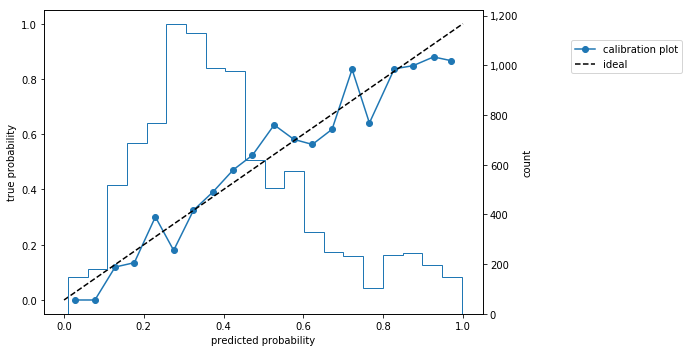

In [110]:
_, ax1 = plt.subplots(figsize=(10, 5))

prob_true, prob_pred = calibration_curve(y_true=Z, y_prob=ps, n_bins=20)
ax1.plot(prob_pred, prob_true, marker='o', label='calibration plot')
ax1.plot([0,1], [0,1], linestyle='--', color='black', label='ideal')
ax1.legend(bbox_to_anchor=(1.2, 0.9), loc='upper left', borderaxespad=0) # 凡例はグラフの外
ax1.set_xlabel('predicted probability')
ax1.set_ylabel('true probability')

ax2 = ax1.twinx()
ax2.hist(ps, bins=20, histtype="step", rwidth=0.9)
ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # 軸ラベル　3桁ごとにカンマ
ax2.set_ylabel('count')
plt.tight_layout()
plt.show()

In [111]:
ps_df = pd.DataFrame(ps, columns=['ps'])
data = pd.concat([data, ps_df], axis=1)

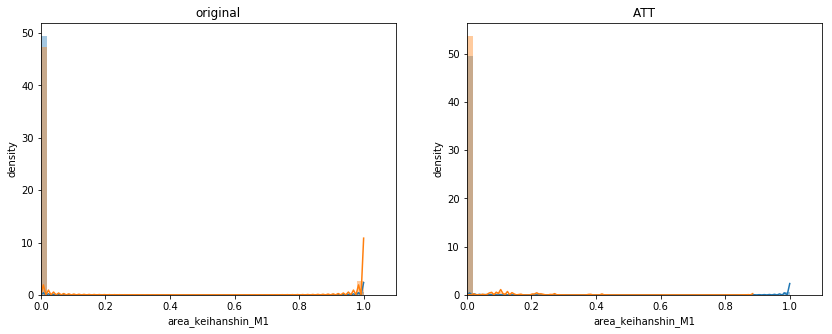

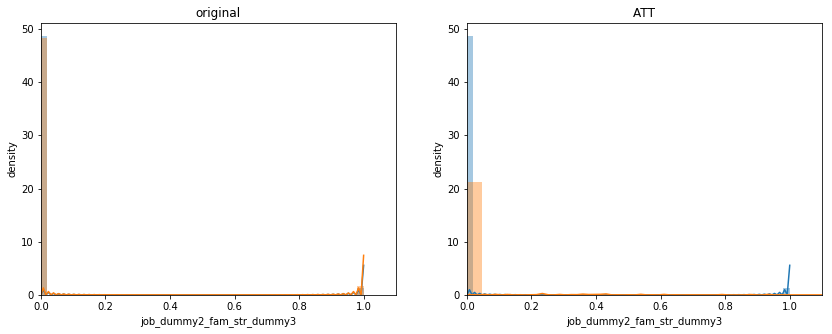

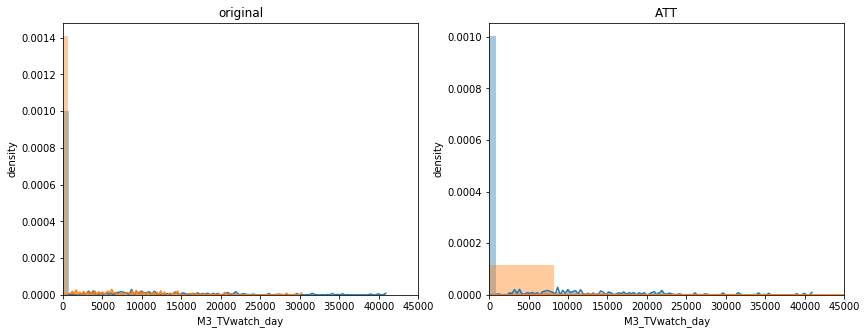

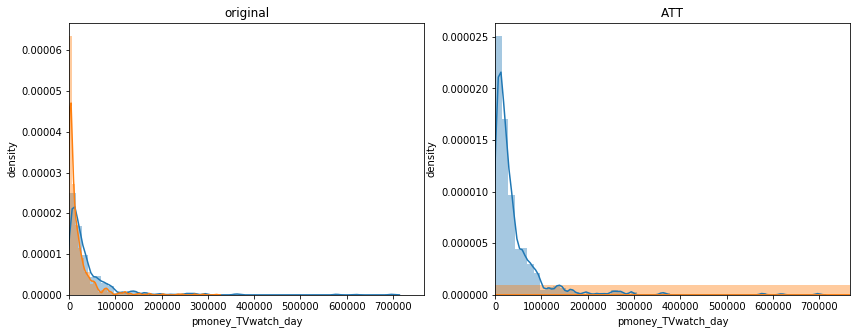

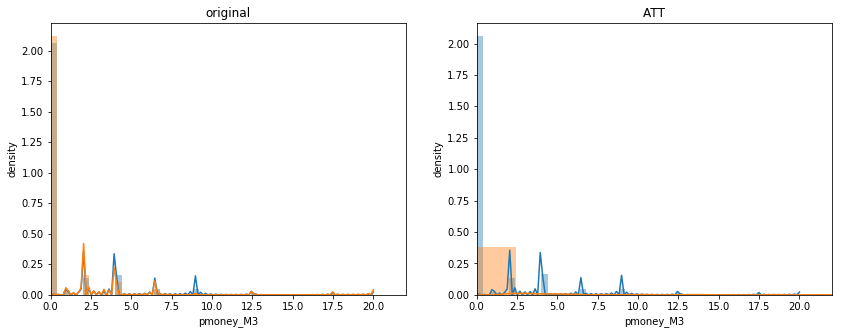

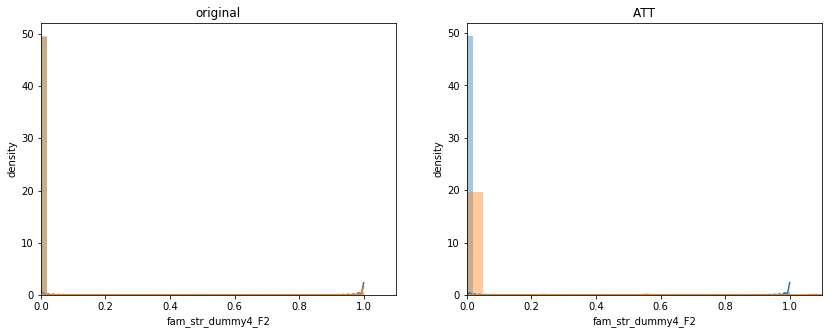

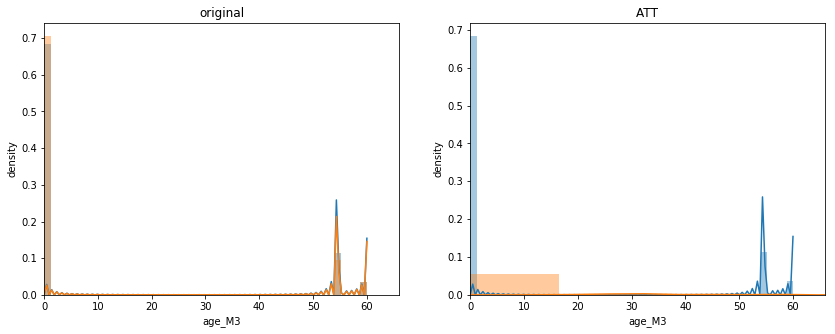

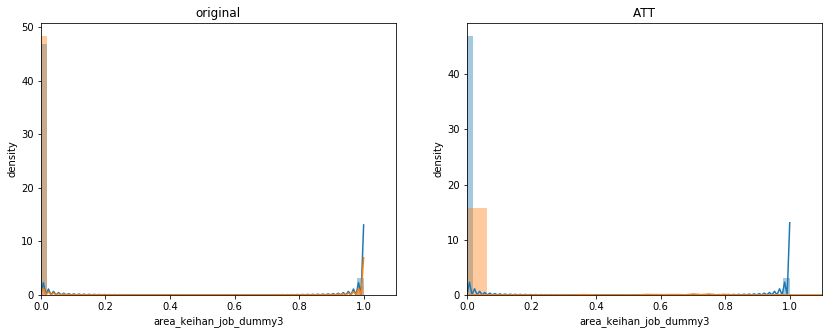

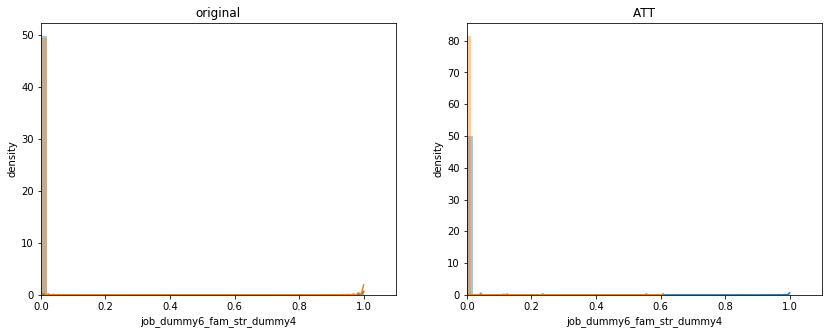

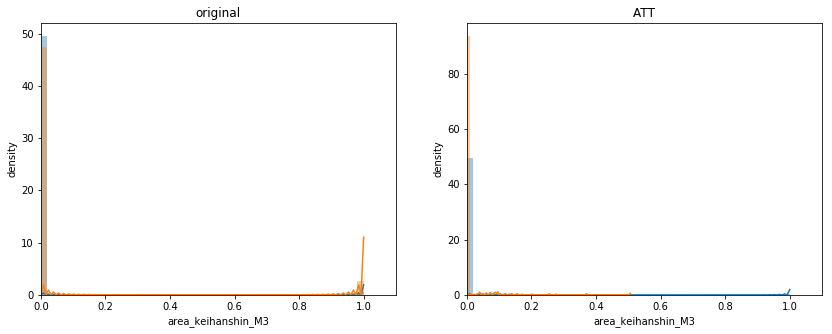

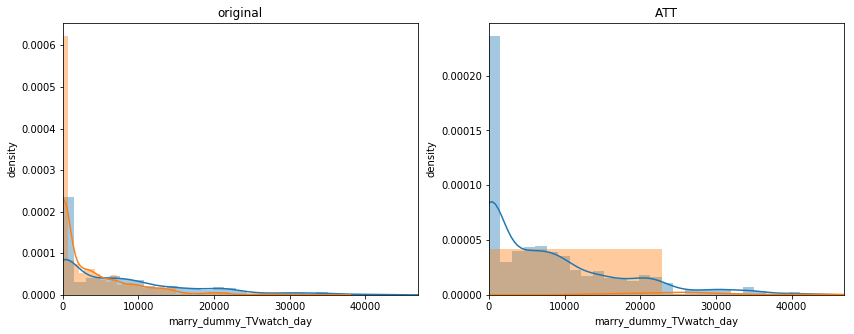

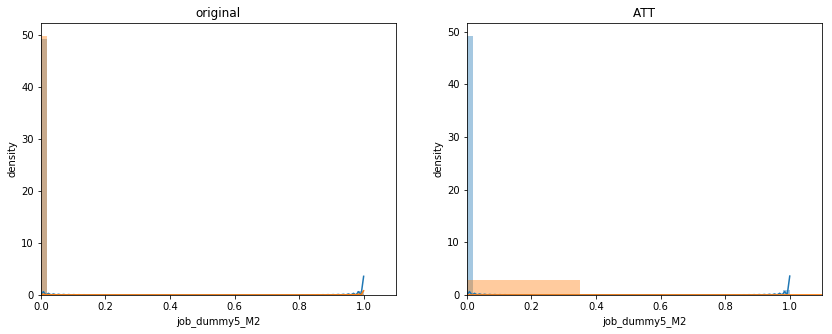

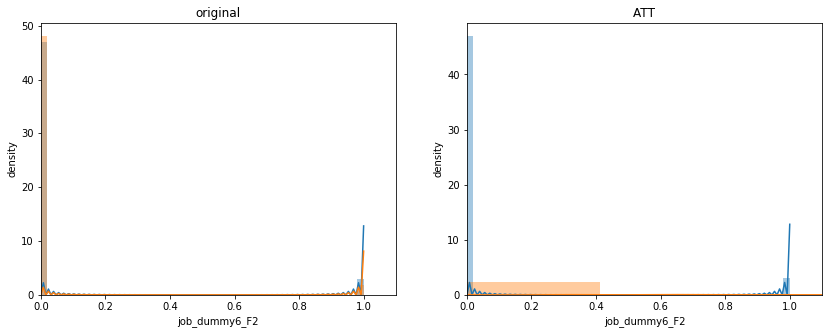

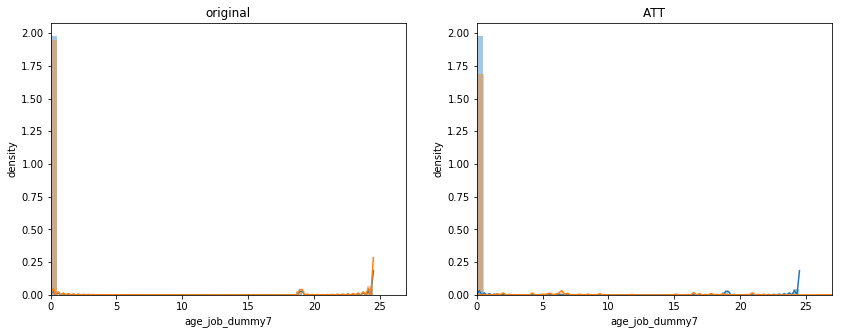

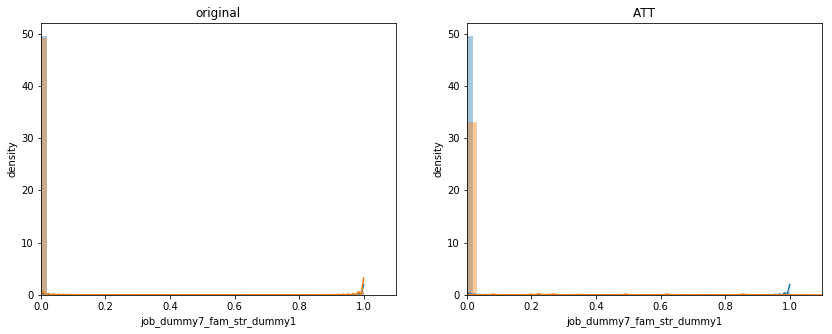

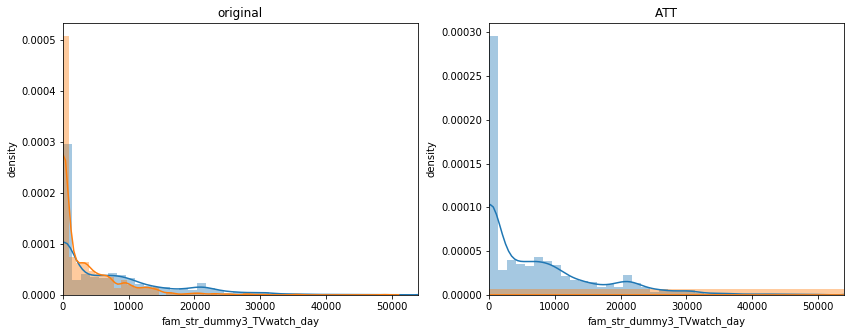

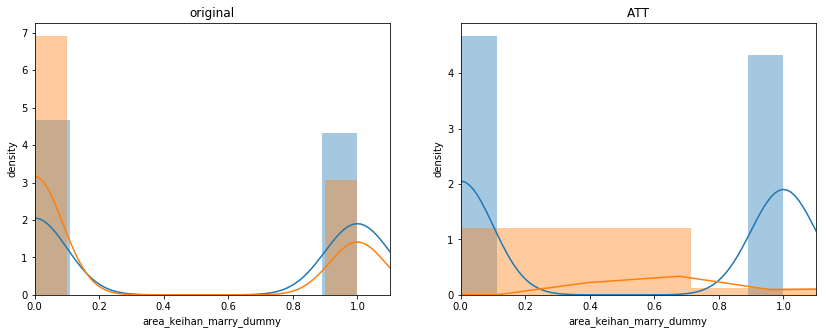

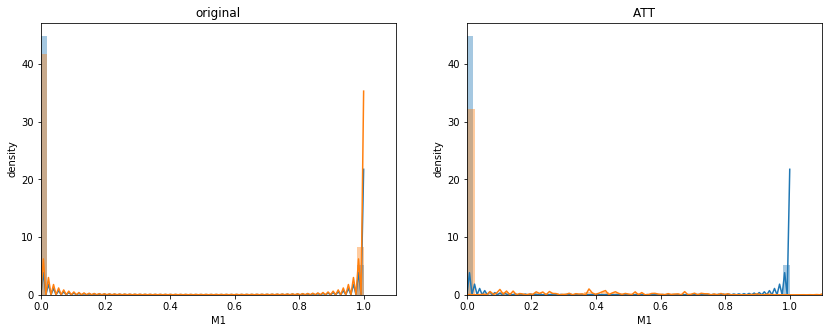

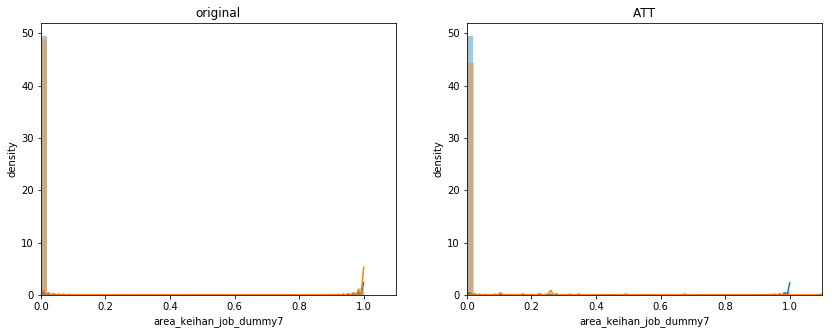

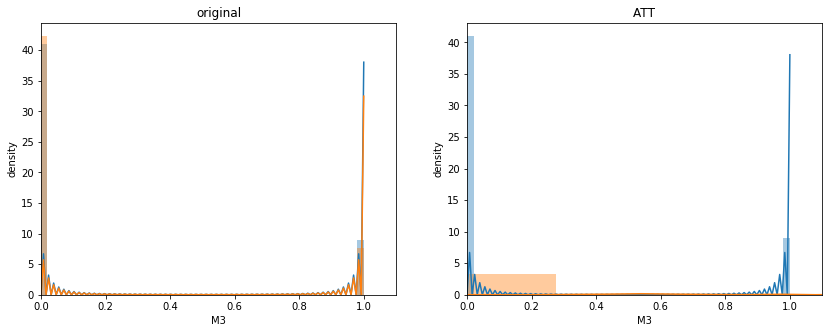

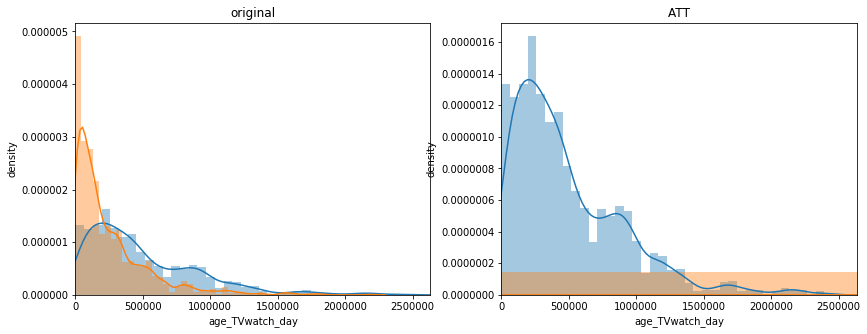

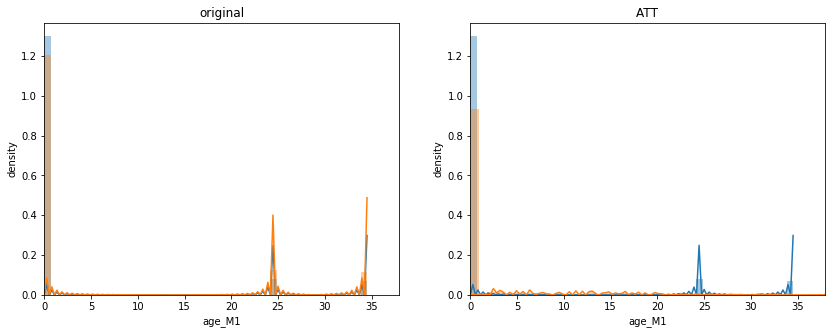

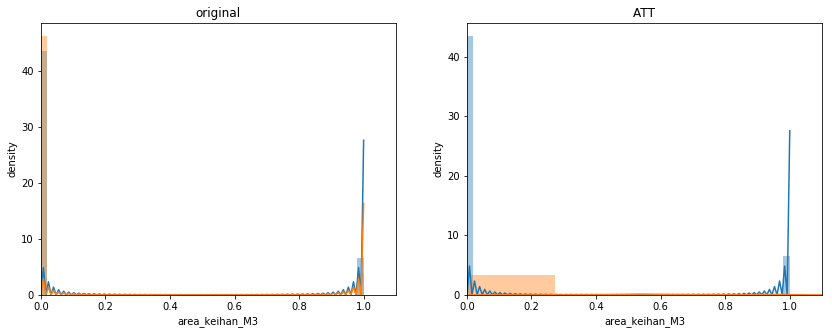

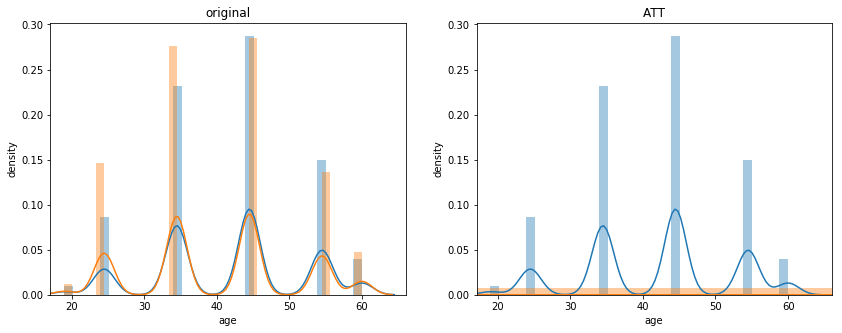

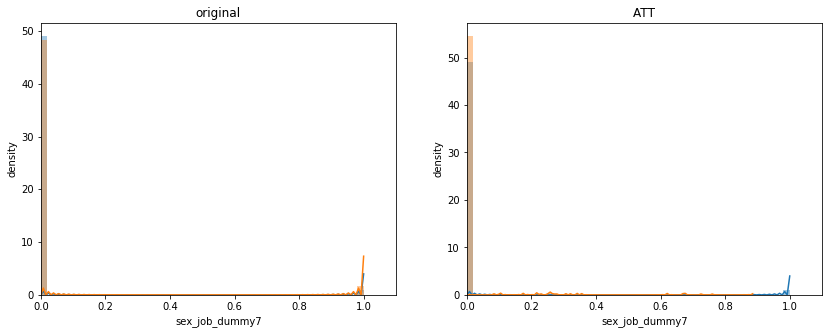

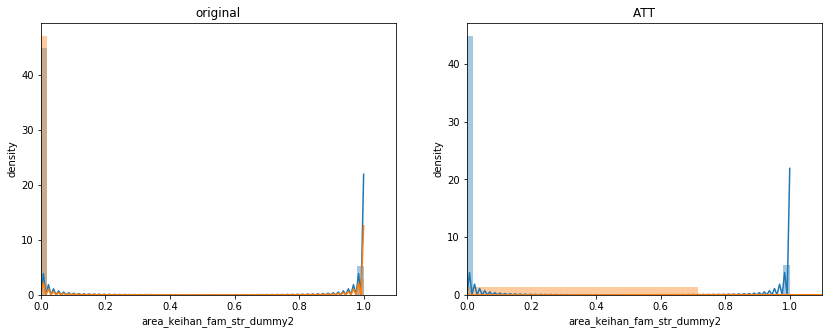

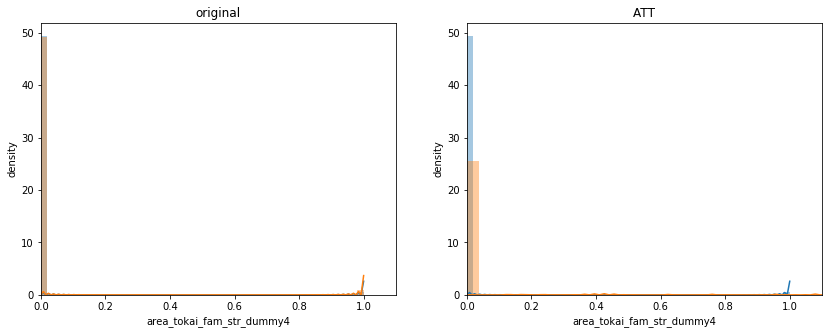

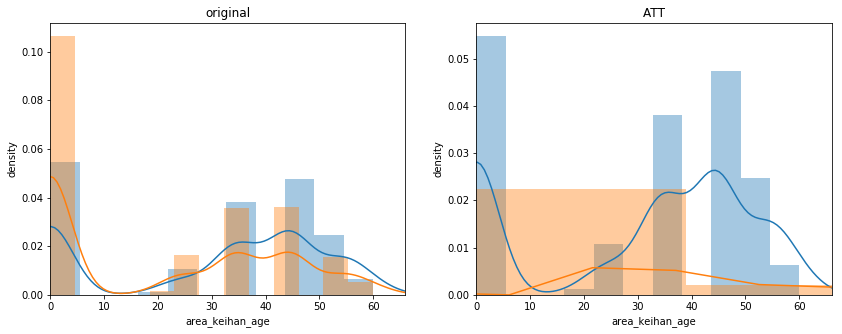

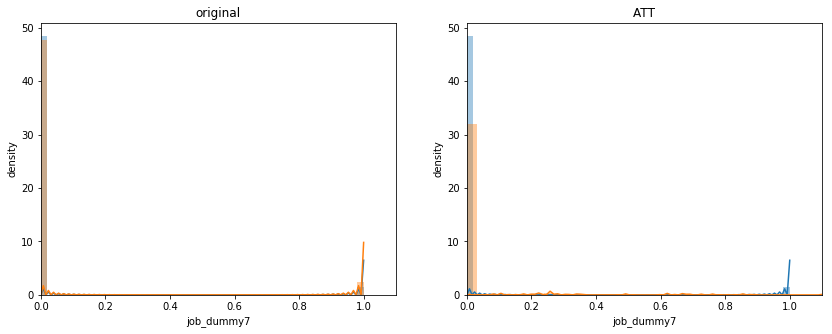

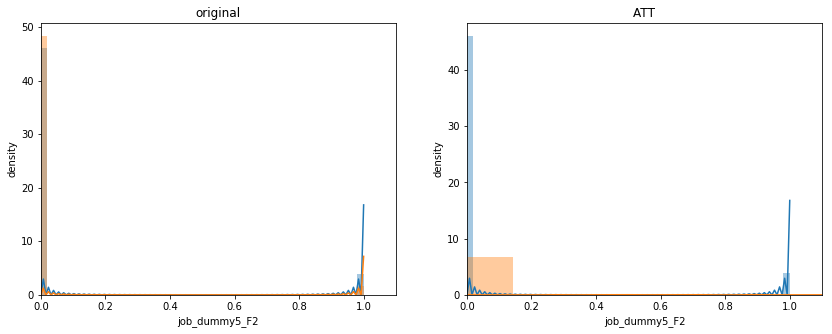

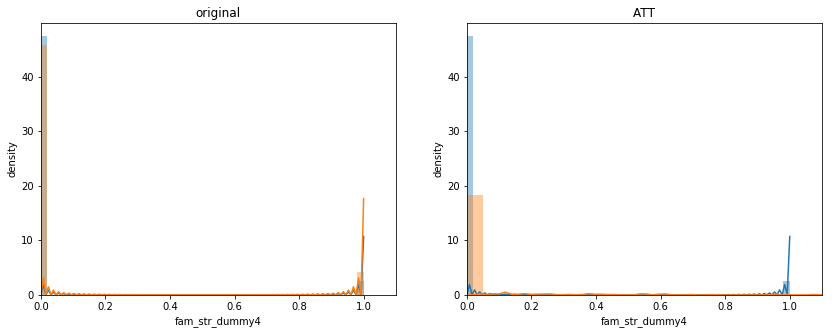

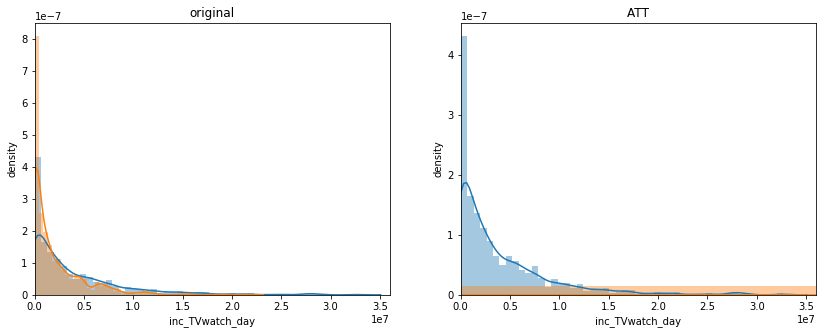

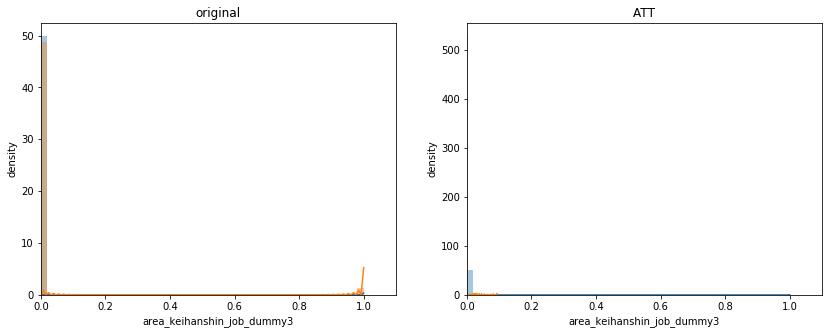

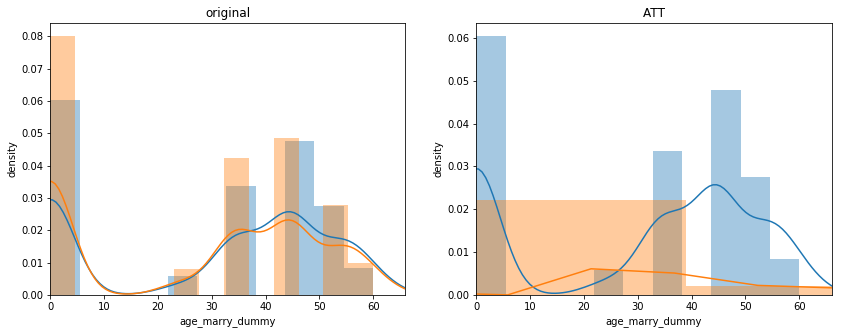

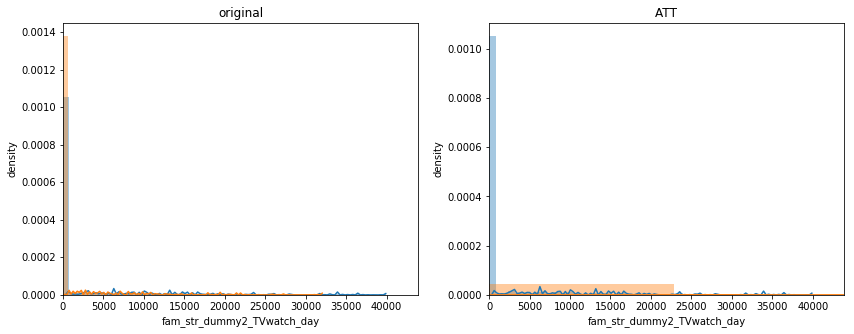

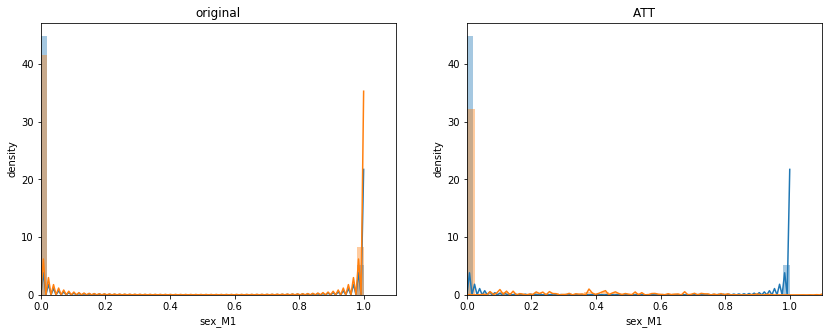

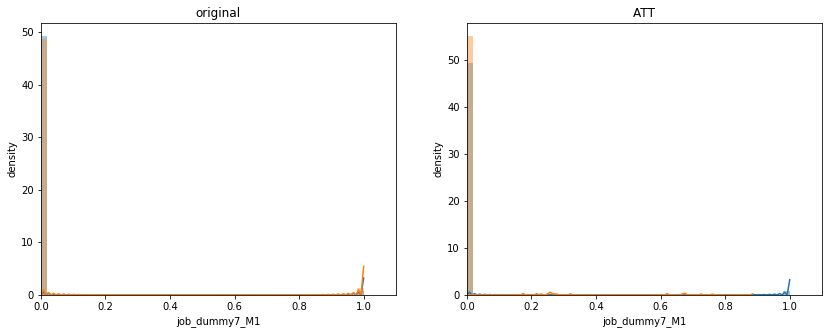

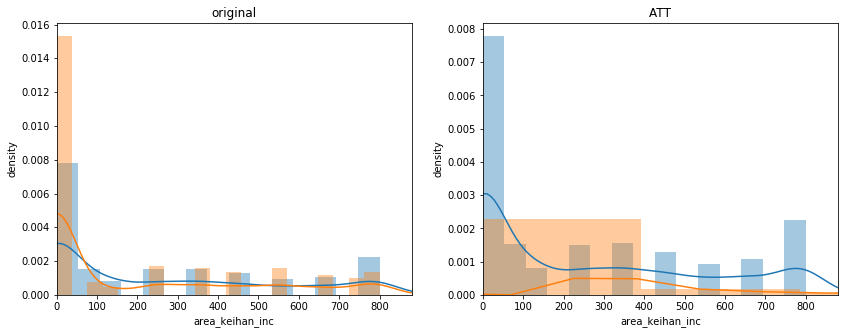

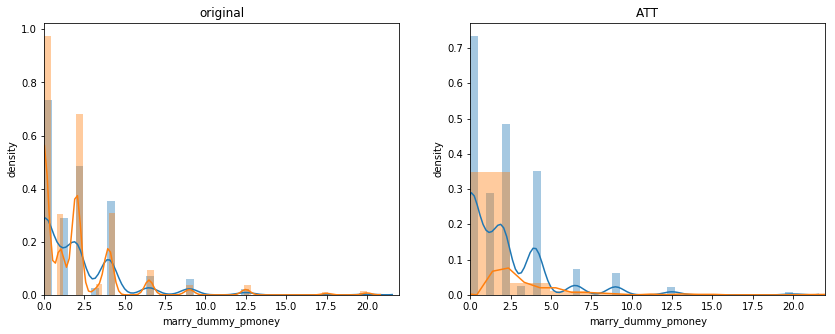

In [57]:
for col in X[covariate_list].columns:
    plot_continuous_covariate_distribution(X=X[covariate_list], Z=Z, ps=ps, var_name=col)

In [112]:
sb_list = []
for col in X[covariate_list].columns:
    if col != 'const':
        sb_before, sb_after = calculate_univariate_standardized_bias(X=X[covariate_list], Z=Z, ps=ps, var_name=col)
        sb_list.append([col, sb_before, sb_after])
sb_df = pd.DataFrame(sb_list, columns=['covariate', 'SB(before)', 'SB(after)'])

area_keihanshin_M1:
standardized bias between treated and untreated = -0.23
difference between treated and adjusted untreated = 0.04
job_dummy2_fam_str_dummy3:
standardized bias between treated and untreated = -0.05
difference between treated and adjusted untreated = 0.06
M3_TVwatch_day:
standardized bias between treated and untreated = 0.22
difference between treated and adjusted untreated = 0.02
pmoney_TVwatch_day:
standardized bias between treated and untreated = 0.41
difference between treated and adjusted untreated = -0.04
pmoney_M3:
standardized bias between treated and untreated = 0.08
difference between treated and adjusted untreated = 0.03
fam_str_dummy4_F2:
standardized bias between treated and untreated = 0.04
difference between treated and adjusted untreated = 0.01
age_M3:
standardized bias between treated and untreated = 0.07
difference between treated and adjusted untreated = 0.06
job_dummy6_fam_str_dummy4:
standardized bias between treated and untreated = -0.08
differenc

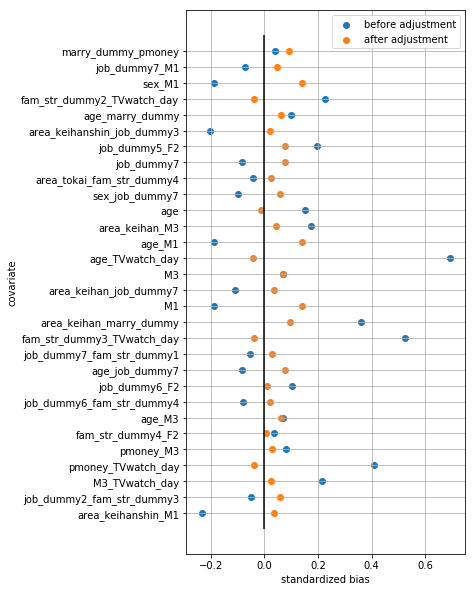

In [113]:
plt.figure(figsize=(5, 10))

plt.scatter(sb_df['SB(before)'], sb_df['covariate'], label='before adjustment')
plt.scatter(sb_df['SB(after)'], sb_df['covariate'], label='after adjustment')
plt.vlines([0], ymin=-1, ymax=X[covariate_list].shape[1])
plt.legend()
plt.xlabel('standardized bias')
plt.ylabel('covariate')
plt.grid(True)
plt.show()

In [114]:
br_list = []
for col in X[covariate_list].columns:
    if col != 'const':
        sb_before, sb_after = calculate_univariate_standardized_bias(X=X[covariate_list], Z=Z, ps=ps, var_name=col)
        br = (abs(sb_before) - abs(sb_after)) / abs(sb_before)
        print(br)
        br_list.append(br)
print('mean bias reduction = {:.3f}'.format(np.mean(br_list)))

area_keihanshin_M1:
standardized bias between treated and untreated = -0.23
difference between treated and adjusted untreated = 0.04
0.8417666846460498
job_dummy2_fam_str_dummy3:
standardized bias between treated and untreated = -0.05
difference between treated and adjusted untreated = 0.06
-0.14624891944886984
M3_TVwatch_day:
standardized bias between treated and untreated = 0.22
difference between treated and adjusted untreated = 0.02
0.8855242341940629
pmoney_TVwatch_day:
standardized bias between treated and untreated = 0.41
difference between treated and adjusted untreated = -0.04
0.9092887611715537
pmoney_M3:
standardized bias between treated and untreated = 0.08
difference between treated and adjusted untreated = 0.03
0.6417591207034578
fam_str_dummy4_F2:
standardized bias between treated and untreated = 0.04
difference between treated and adjusted untreated = 0.01
0.8522004183886089
age_M3:
standardized bias between treated and untreated = 0.07
difference between treated and ad

In [78]:
sample_size = len(data.loc[data['cm_dummy']==1])
ATT_list = []

for i in range(10000):
    idx1 = pd.Series(data.loc[data['cm_dummy']==1, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    idx0 = pd.Series(data.loc[data['cm_dummy']==0, 'gamedummy'].index).sample(n=sample_size, replace=True, random_state=i)
    
    Z_tmp = np.r_[Z[idx1], Z[idx0]]
    Y_tmp = np.r_[Y[idx1], Y[idx0]]
    ps_tmp = np.r_[ps[idx1], ps[idx0]]
    w01_tmp = (1-Z_tmp)*ps_tmp/(1-ps_tmp)
    
    E1 = np.mean(Y_tmp[Z_tmp==1])
    E0 = np.sum(Y_tmp * w01_tmp) / np.sum(w01_tmp)
    ATT = E1 - E0
    ATT_list.append(ATT)
    
print('ATT = {:.3f} ± {:.3f} (s.d.={:.3f})'.format(np.mean(ATT_list), np.std(ATT_list)*1.96, np.std(ATT_list)))

ATT = 0.035 ± 0.014 (s.d.=0.007)


### 所感
- CM接触効果のダミーデータでは因果効果は正しく推定できないのでは？
    - TVwatchdayのバイアスはかなり減少している（それっぽい
    
- 交互作用項を入れる・CM接触よりアプリ利用に効いている変数を入れる
    - bias reductionはかなり改善
    - ただし、まだまだbiasは大きい
    - このデータで正しく因果効果推定できないやつでは…